# Overview

In [ ]:
pip install jupyter-dash dash-cytoscape -qq

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10.2/10.2 MB 16.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.6/1.6 MB 40.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from geopy.geocoders import Nominatim
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
pd.options.mode.chained_assignment = None

from jupyter_dash import JupyterDash
import dash_cytoscape as cyto
from dash import html
from dash import dcc
from dash.dependencies import Output, Input
import plotly.express as px
import math
from dash import no_update

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PhaÃÇn tiÃÅch vaÃÄ truÃõÃ£c quan DL/raw_data.csv')
df.head()

Gi√° Di·ªán t√≠ch Ph√≤ng ng·ªß                            Lo·∫°i  \
0     700 tri·ªáu     60m2        NaN                  B√°n nh√† ri√™ng    
1  63 tri·ªáu /m2    250m2        NaN   ƒê·∫•t n·ªÅn - ƒê·∫•t ·ªü - ƒê·∫•t th·ªï c∆∞    
2     680 tri·ªáu     80m2      2 PN                  B√°n nh√† ri√™ng     
3     670 tri·ªáu     84m2      2 PN                  B√°n nh√† ri√™ng     
4      7,000/m2     90m2      2 PN                     B√°n nh√† ph·ªë    

        H∆∞·ªõng       T·∫ßng  Toilet ƒê∆∞·ªùng tr∆∞·ªõc nh√†  Ph√≤ng kh√°ch     Ph√°p l√Ω  \
0         NaN        NaN     NaN             NaN          NaN         NaN   
1   ƒê√¥ng B·∫Øc         NaN     NaN      10m - 15m           NaN    S·ªï h·ªìng    
2         NaN   1 t·∫ßng       2.0            8m            1.0    S·ªï h·ªìng    
3         NaN   2 t·∫ßng       2.0            6m            1.0    S·ªï h·ªìng    
4         NaN        NaN     2.0             NaN          1.0   H·ª£p ƒë·ªìng    

                                  V·ªã tr√≠  \
0                 10.8839675,106.5870611   
1   10.707568384413616,106.7071383618691   
2  10.842114691706804,106.59722456931152   
3                 10.8479835,106.5866452   
4  10.781366413891242,106.72031374601438   

                                        Th√¥ng tin  \
0  M√£ t√†i s·∫£n: 22102157608 / C·∫≠p nh·∫≠t: 18-10-2022   
1  M√£ t√†i s·∫£n: 22102156387 / C·∫≠p nh·∫≠t: 18-10-2022   
2  M√£ t√†i s·∫£n: 22102152324 / C·∫≠p nh·∫≠t: 18-10-2022   
3  M√£ t√†i s·∫£n: 22102156181 / C·∫≠p nh·∫≠t: 18-10-2022   
4  M√£ t√†i s·∫£n: 22102152084 / C·∫≠p nh·∫≠t: 17-10-2022   

                                               M√¥ t·∫£  
0  \nB√°n cƒÉn nh√† 1 l·∫ßu ƒë∆∞·ªùng Nguy·ªÖn VƒÉn B·ª©a, H√≥c ...  
1  \nB√°n nhi·ªÅu l√¥ ƒë·∫•t th√°i s∆°n 1 b·ªô qu·ªëc ph√≤ng 10...  
2   \n                        4x 20m vu√¥ng v·ª©c 80...  
3   \n                        t√¥i b√°n nh√† 1 tr·ªát ...  
4  \nT·ªîNG QUAN D·ª∞ √ÅN \n\n- T·ªïng di·ªán t√≠ch ƒë·∫•t: 9....

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gi√°              8594 non-null   object 
 1   Di·ªán t√≠ch        8028 non-null   object 
 2   Ph√≤ng ng·ªß        4150 non-null   object 
 3   Lo·∫°i             8591 non-null   object 
 4   H∆∞·ªõng            1616 non-null   object 
 5   T·∫ßng             3824 non-null   object 
 6   Toilet           4026 non-null   float64
 7   ƒê∆∞·ªùng tr∆∞·ªõc nh√†  4971 non-null   object 
 8   Ph√≤ng kh√°ch      3201 non-null   float64
 9   Ph√°p l√Ω          6389 non-null   object 
 10  V·ªã tr√≠           8592 non-null   object 
 11  Th√¥ng tin        8594 non-null   object 
 12  M√¥ t·∫£            8594 non-null   object 
dtypes: float64(2), object(11)
memory usage: 873.0+ KB


# 1. Ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu

In [ ]:
df.drop_duplicates(subset=['M√¥ t·∫£'], inplace=True)

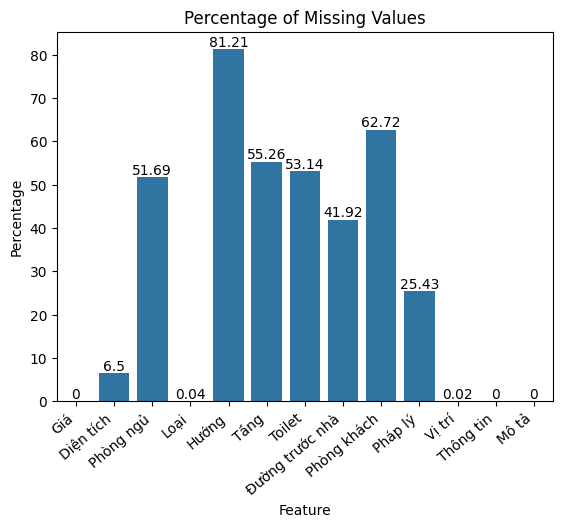

In [ ]:
null_percentage = round(df.isnull().mean() * 100,2)
ax = sns.barplot(x=null_percentage.index, y=null_percentage)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.bar_label(ax.containers[0]);
ax.set_xlabel('Feature')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Missing Values')
plt.show()

C√≥ th·ªÉ th·∫•y c√°c thu·ªôc t√≠nh nh∆∞ gi√° (target), lo·∫°i, v·ªã tr√≠, th√¥ng tin, m√¥ t·∫£ g·∫ßn nh∆∞ kh√¥ng t·ªìn t·∫°i missing values. C√≤n c√°c thu·ªôc t√≠nh c√≤n l·∫°i c√≥ t·ªâ l·ªá missing values kh√° l·ªõn.

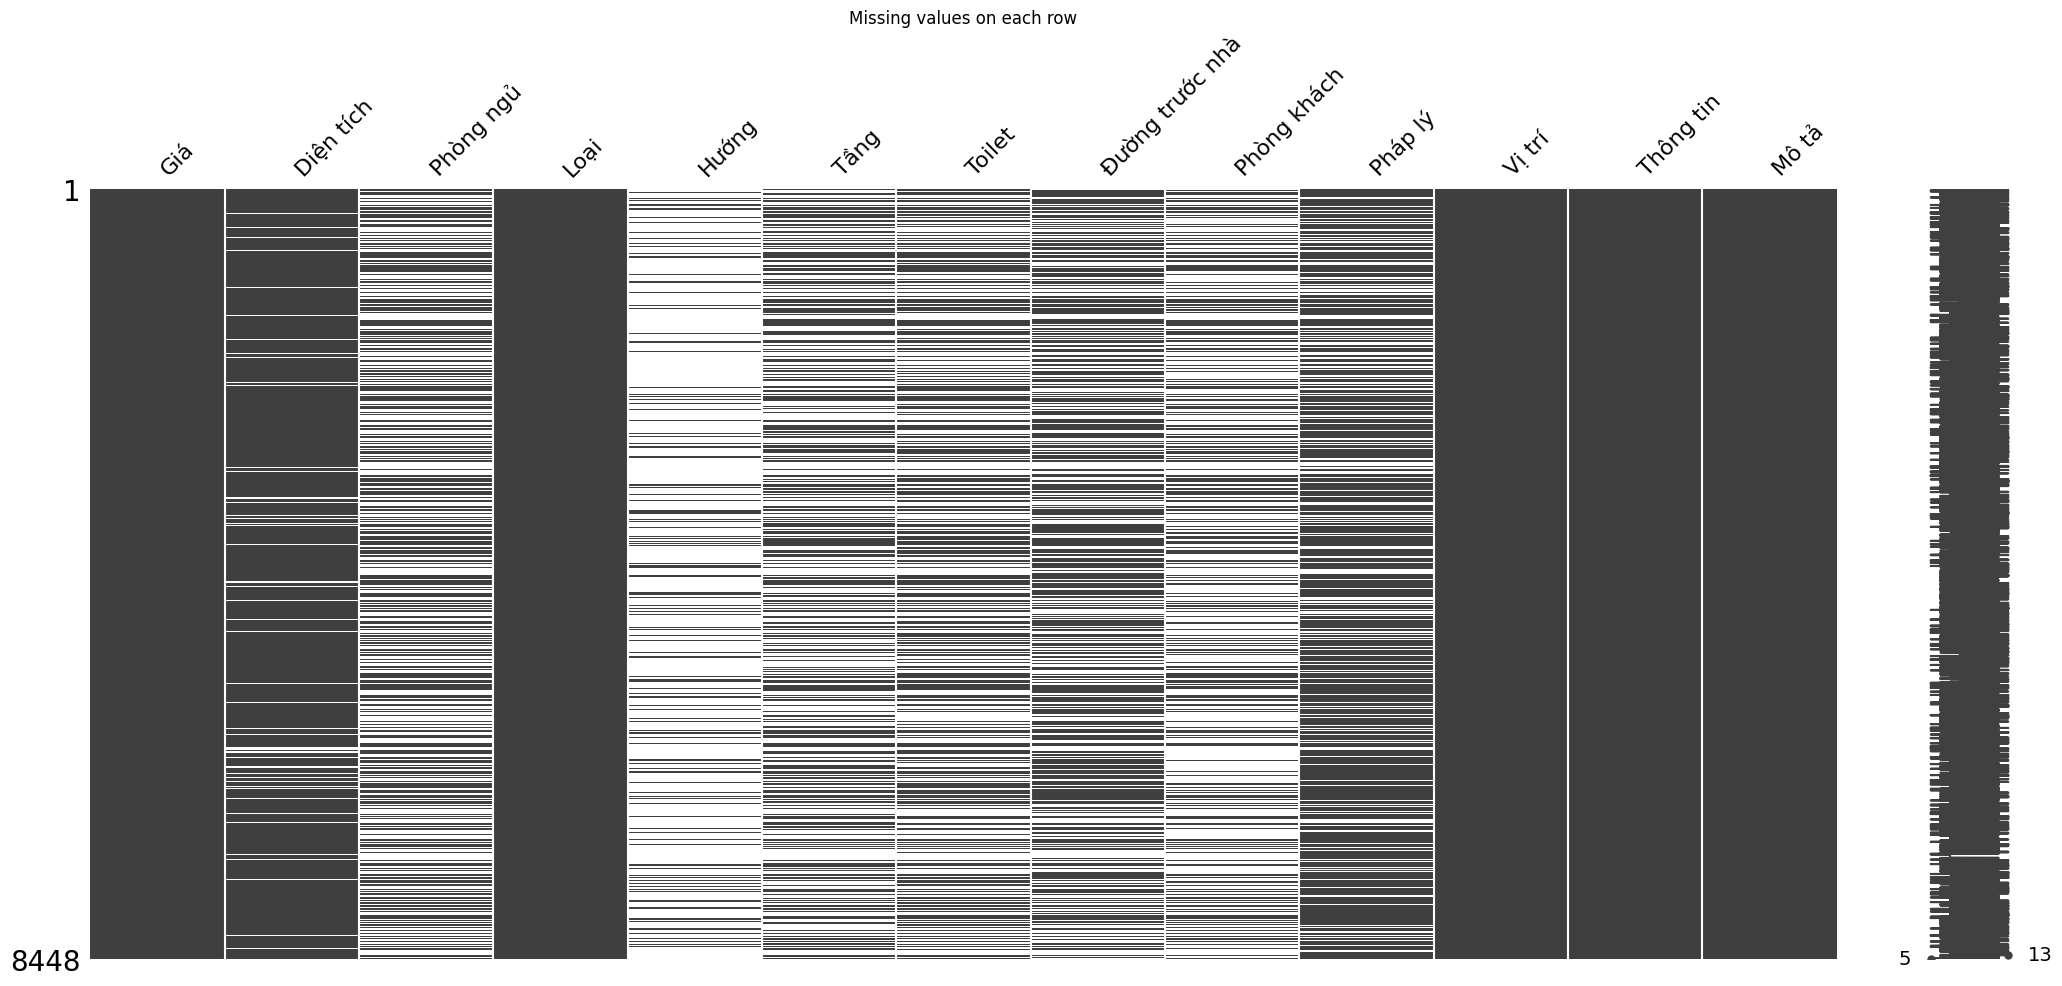

<Figure size 1500x900 with 0 Axes>

In [ ]:
import missingno as msno
ax = msno.matrix(df)
ax.set_title("Missing values on each row")
plt.figure(figsize = (15,9))
plt.show()

<Axes: >

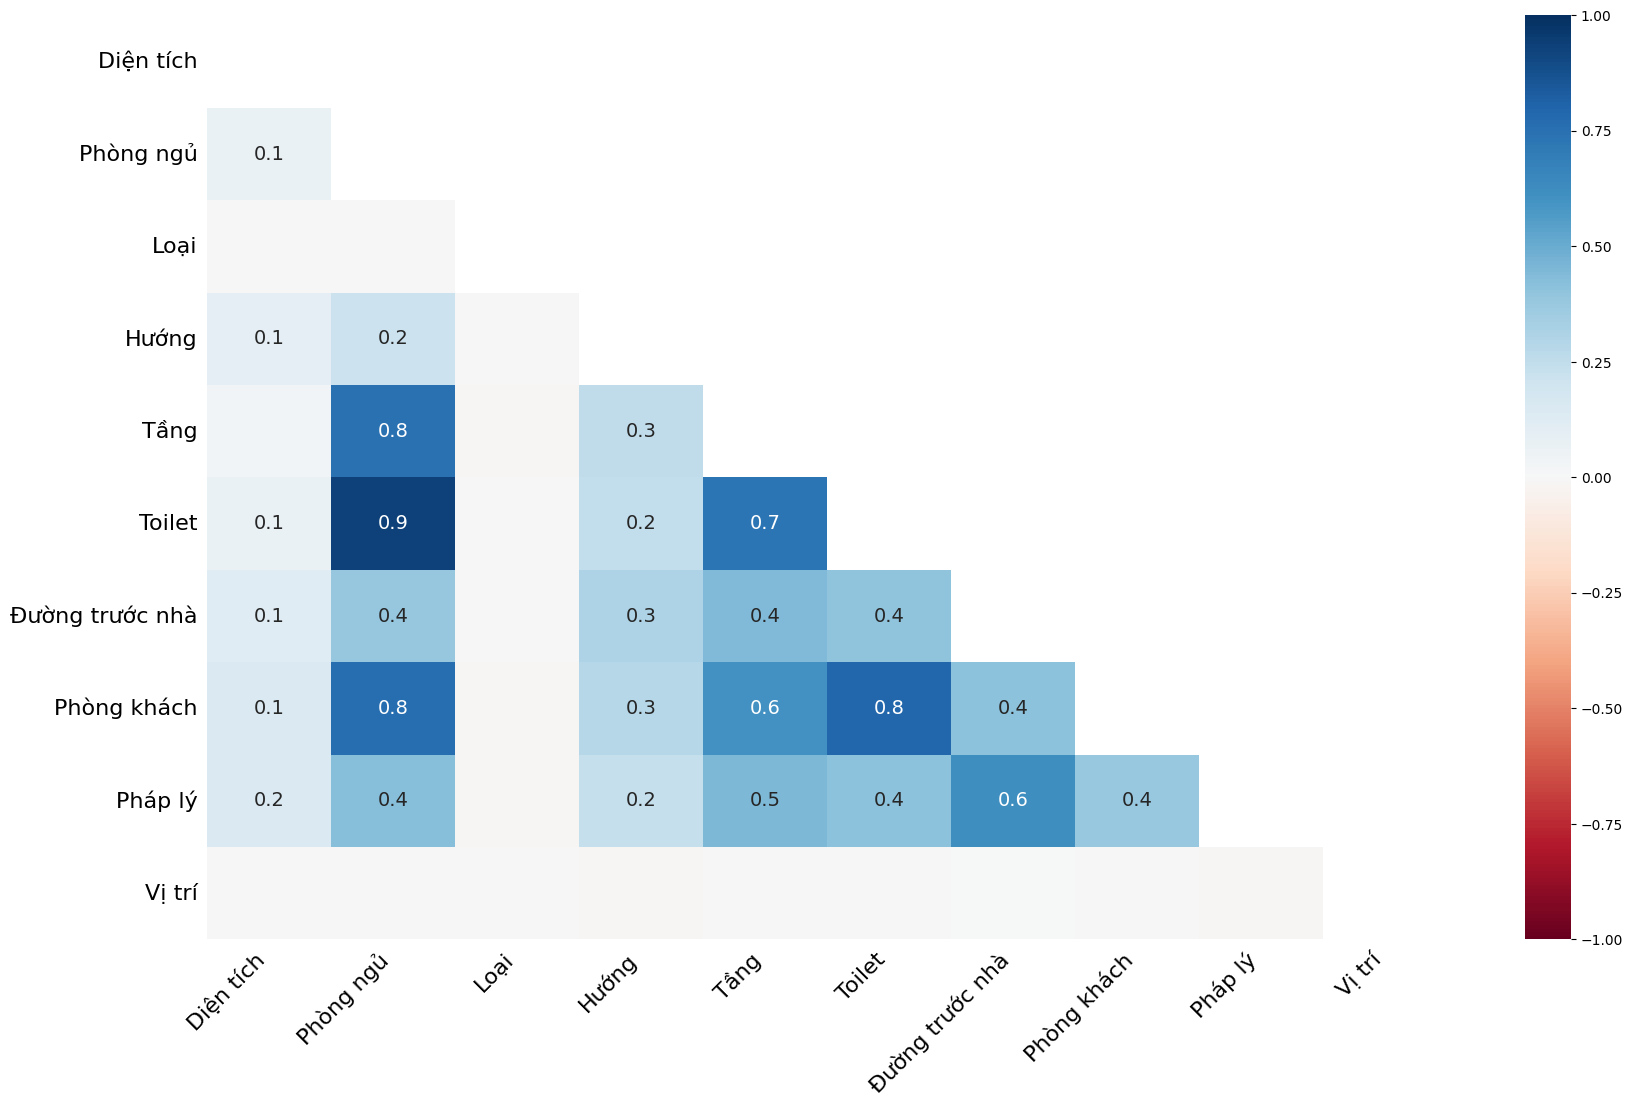

In [ ]:
msno.heatmap(df, labels = True)

Correlation heatmap ·ªü tr√™n bi·ªÉu di·ªÖn t∆∞∆°ng quan c·ªßa c√°c thu·ªôc t√≠nh th√¥ng qua missing values. T∆∞∆°ng quan n√†y ƒë∆∞·ª£c x√°c ƒë·ªãnh khi m·ªôt c·ªôt c√≥ gi√° tr·ªã null th√¨ c·ªôt c√≤n l·∫°i c√≥ gi√° tr·ªã null hay kh√¥ng

Nullity correlation thu·ªôc kho·∫£ng (-1, 1)

- -1 Nghƒ©a l√† khi m·ªôt c·ªôt (feature) c√≥ gi√° tr·ªã kh√°c null, c·ªôt c√≤n l·∫°i s·∫Ω c√≥ gi√° tr·ªã null
- 0 Nghƒ©a l√† kh√¥ng c√≥ s·ª± t∆∞∆°ng quan gi·ªØa 2 c·ªôt (feature)
- 1 Nghƒ©a l√† khi m·ªôt c·ªôt (feature) c√≥ gi√° tr·ªã kh√°c null, c·ªôt c√≤n l·∫°i c≈©ng c√≥ gi√° tr·ªã kh√°c null v√† ng∆∞·ª£c l·∫°i.

Kh√¥ng gi·ªëng nh∆∞ c√°c heatmap kh√°c, null correlation heatmap c√≥ kh√° nhi·ªÅu c·ªôt kh√¥ng ch·ª©a gi√° tr·ªã (m√†u tr·∫Øng), ƒë√¢y l√† nh·ªØng c·ªôt g·∫ßn nh∆∞ null ho·∫∑c g·∫ßn nh∆∞ kh√¥ng c√≥ missing value. Nh·ªØng c·ªôt n√†y s·∫Ω ƒë∆∞·ª£c heatmap lo·∫°i b·ªè v√¨ kh√¥ng ƒëem l·∫°i th√¥ng tin c√≥ gi√° tr·ªã

V√≠ d·ª• nh∆∞ bi·∫øn ph√≤ng ng·ªß v√† toilet c√≥ null correlation r·∫•t cao (0.9), nghƒ©a l√† khi bi·∫øn ph√≤ng ng·ªß b·ªã b·ªè tr·ªëng th√¨ bi·∫øn toilet c≈©ng b·ªã b·ªè tr·ªëng. V√¨ v·∫≠y, n·∫øu x√°c ƒë·ªãnh x√≥a gi√° tr·ªã null tr√™n bi·∫øn ph√≤ng ng·ªß th√¨ c≈©ng n√™n x√≥a c√°c d√≤ng t∆∞∆°ng ·ª©ng trong bi·∫øn toilet.

In [ ]:
object_cols = df.select_dtypes(include='object')
for col in object_cols.columns:
  df[col] = df[col].str.lower()
  df[col] = df[col].str.replace('\n','')
  df[col] =df[col].str.strip()

In [ ]:
df.dropna(subset=['Lo·∫°i', 'V·ªã tr√≠'], inplace=True)

In [ ]:
df['Di·ªán t√≠ch'] = df['Di·ªán t√≠ch'].str.replace(',', '.').str[:-2].astype(float)
df['Di·ªán t√≠ch'].value_counts()

80.0     400
100.0    305
60.0     235
90.0     212
50.0     148
        ... 
760.0      1
198.2      1
321.4      1
117.5      1
249.0      1
Name: Di·ªán t√≠ch, Length: 910, dtype: int64

In [ ]:
df['Di·ªán t√≠ch'].fillna(value=df['Di·ªán t√≠ch'].median(), inplace=True)

In [ ]:
df = df[df['Gi√°'] != 'Th∆∞∆°ng l∆∞·ª£ng']

def norm_price(price, area):
  x = np.nan
  split = price.replace(',', '.').split(' ', 3)
  while len(split) < 4:
    split.append(None)
  temp1, temp2, temp3, temp4 = split

  if temp2 == 't·ª∑':
    x = float(temp1) * 10 ** 9
    if temp4 == 'tri·ªáu':
      x += float(temp3) * 10 ** 6
  elif (temp2 == 'tri·ªáu' and temp3 == '/m2') or temp2 == 'tri·ªáu/m2':
    x = area * float(temp1) * 10 ** 6
  elif temp2 == 'tri·ªáu':
    x = float(temp1) * 10 ** 6

  return x

df['Gi√°'] = df.apply(lambda row: norm_price(row['Gi√°'], row['Di·ªán t√≠ch']), axis=1)
df.dropna(subset=['Gi√°'], inplace=True)
df['Gi√°'] = df['Gi√°'].astype(float) / 10 ** 9

df = df[df['Gi√°'] >= 0.3]

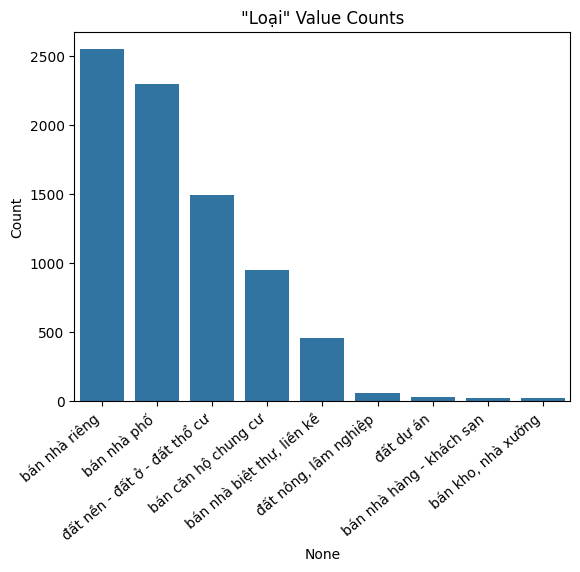

In [ ]:
cat_count = df['Lo·∫°i'].value_counts()
ax = sns.barplot(x=cat_count.index, y=cat_count)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_ylabel('Count')
ax.set_title('"Lo·∫°i" Value Counts')
plt.show()

In [ ]:
df = df[df['Lo·∫°i'].apply(lambda row: row not in ['B√°n nh√† h√†ng - Kh√°ch s·∫°n', 'B√°n kho, nh√† x∆∞·ªüng'])]

can_ho = ['B√°n nh√† ri√™ng', 'B√°n nh√† ph·ªë', 'B√°n cƒÉn h·ªô chung c∆∞', 'B√°n nh√† bi·ªát th·ª±, li·ªÅn k·ªÅ']
df['CƒÉn h·ªô'] = df['Lo·∫°i'].apply(lambda row: 1 if row in can_ho else 0)

In [ ]:
df['Ph√≤ng ng·ªß'] = df['Ph√≤ng ng·ªß'].str.split().str[0]
df['T·∫ßng'] = df['T·∫ßng'].str.split().str[0]

for i in ['Ph√≤ng ng·ªß', 'T·∫ßng', 'Toilet', 'Ph√≤ng kh√°ch']:
  df[i] = df.apply(lambda row: row[i] if not pd.isna(row[i]) else (1 if row['CƒÉn h·ªô'] == 1 else 0), axis=1)
  df[i] = df[i].astype(int)

In [ ]:
df[['temp1', 'temp2']] = df['ƒê∆∞·ªùng tr∆∞·ªõc nh√†'].str.replace('m', '').str.replace('>', '').str.split(' - ', expand=True)
df['ƒê∆∞·ªùng tr∆∞·ªõc nh√†'] = df.apply(lambda row: 0 if pd.isna(row['ƒê∆∞·ªùng tr∆∞·ªõc nh√†']) else
                                 (row['temp1'] if pd.isna(row['temp2']) else np.mean([int(row['temp1']), int(row['temp2'])])), axis=1)
df['ƒê∆∞·ªùng tr∆∞·ªõc nh√†'] = df['ƒê∆∞·ªùng tr∆∞·ªõc nh√†'].astype(float)

In [ ]:
df['V·ªã tr√≠'].value_counts()

10.876248,106.660338      679
10.8019128,106.7647475     90
10.7756587,106.7004238     85
10.8103172,106.7309796     49
10.7745965,106.6679542     49
                         ... 
10.8602356,106.7568433      1
10.7161241,106.7400117      1
10.7927909,106.6839011      1
10.6425712,106.6438673      1
10.7854876,106.6470047      1
Name: V·ªã tr√≠, Length: 2823, dtype: int64

In [ ]:
df[['Vƒ© ƒë·ªô', 'Kinh ƒë·ªô']] = df['V·ªã tr√≠'].str.split(',', expand=True).astype(float)

In [ ]:
geolocator = Nominatim(user_agent='geoapiExercises')

def get_district(locator, lat, long):
  location = locator.reverse(str(lat) + ',' + str(long)).raw['address']
  return location.get('city_district', location.get('district', location.get('city', np.nan)))

df['Qu·∫≠n/Huy·ªán'] = df.apply(lambda row: get_district(geolocator, row['Vƒ© ƒë·ªô'], row['Kinh ƒë·ªô']), axis=1)
df.dropna(subset=['Qu·∫≠n/Huy·ªán'], inplace=True)

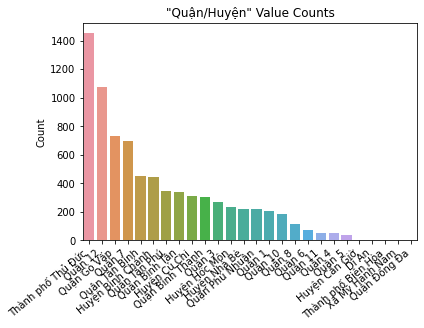

In [ ]:
district_count = df['Qu·∫≠n/Huy·ªán'].value_counts()
ax = sns.barplot(x=district_count.index, y=district_count)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_ylabel('Count')
ax.set_title('"Qu·∫≠n/Huy·ªán" Value Counts')
plt.show()

In [ ]:
df = df[~df['Qu·∫≠n/Huy·ªán'].isin(['Dƒ© An', 'Th√†nh ph·ªë Bi√™n H√≤a', 'X√£ M·ªπ H·∫°nh Nam', 'Qu·∫≠n ƒê·ªëng ƒêa'])]

In [ ]:
df['Th√¥ng tin'] = df['Th√¥ng tin'].str.split().str[7]
df.rename(columns={'Th√¥ng tin': 'Ng√†y ƒëƒÉng'}, inplace=True)

In [ ]:
df.drop(columns=['V·ªã tr√≠', 'temp1', 'temp2'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.to_csv('cleaned_data.csv', index=False)

# 2. Ph√¢n t√≠ch v√† tr·ª±c quan d·ªØ li·ªáu

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PhaÃÇn tiÃÅch vaÃÄ truÃõÃ£c quan DL/cleaned_data.csv')
df.head()

Gi√°  Di·ªán t√≠ch  Ph√≤ng ng·ªß                          Lo·∫°i     H∆∞·ªõng  T·∫ßng  \
0   0.70       60.0          1                 B√°n nh√† ri√™ng       NaN     1   
1  15.75      250.0          0  ƒê·∫•t n·ªÅn - ƒê·∫•t ·ªü - ƒê·∫•t th·ªï c∆∞  ƒê√¥ng B·∫Øc     0   
2   0.68       80.0          2                 B√°n nh√† ri√™ng       NaN     1   
3   0.67       84.0          2                 B√°n nh√† ri√™ng       NaN     2   
4  12.50      100.0          8                   B√°n nh√† ph·ªë       NaN     3   

   Toilet  ƒê∆∞·ªùng tr∆∞·ªõc nh√†  Ph√≤ng kh√°ch  Ph√°p l√Ω   Ng√†y ƒëƒÉng  \
0       1              0.0            1      NaN  18-10-2022   
1       0             12.5            0  S·ªï h·ªìng  18-10-2022   
2       2              8.0            1  S·ªï h·ªìng  18-10-2022   
3       2              6.0            1  S·ªï h·ªìng  18-10-2022   
4       8              0.0            1  S·ªï h·ªìng  17-10-2022   

                                               M√¥ t·∫£  CƒÉn h·ªô      Vƒ© ƒë·ªô  \
0  B√°n cƒÉn nh√† 1 l·∫ßu ƒë∆∞·ªùng Nguy·ªÖn VƒÉn B·ª©a, H√≥c M√¥...       1  10.883968   
1  B√°n nhi·ªÅu l√¥ ƒë·∫•t th√°i s∆°n 1 b·ªô qu·ªëc ph√≤ng 10x2...       0  10.707568   
2  4x 20m vu√¥ng v·ª©c 80 m2\r\nƒê∆∞·ªùng tr∆∞·ªõc nh√† 8m x...       1  10.842115   
3  t√¥i b√°n nh√† 1 tr·ªát 1 l·∫ßu H√≥c M√¥n\r\nDt sd 84m2...       1  10.847983   
4  + Con ƒë∆∞∆°ÃÄng chiÃÅnh ƒëi Q1, Q3, s√¢n bay\n+ T√¢Ã£p...       1  10.808407   

      Kinh ƒë·ªô      Qu·∫≠n/Huy·ªán  
0  106.587061   Huy·ªán H√≥c M√¥n  
1  106.707138    Huy·ªán Nh√† B√®  
2  106.597225   Huy·ªán H√≥c M√¥n  
3  106.586645   Huy·ªán H√≥c M√¥n  
4  106.673638  Qu·∫≠n Ph√∫ Nhu·∫≠n

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7811 entries, 0 to 7810
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gi√°              7811 non-null   float64
 1   Di·ªán t√≠ch        7811 non-null   float64
 2   Ph√≤ng ng·ªß        7811 non-null   int64  
 3   Lo·∫°i             7811 non-null   object 
 4   H∆∞·ªõng            1514 non-null   object 
 5   T·∫ßng             7811 non-null   int64  
 6   Toilet           7811 non-null   int64  
 7   ƒê∆∞·ªùng tr∆∞·ªõc nh√†  7811 non-null   float64
 8   Ph√≤ng kh√°ch      7811 non-null   int64  
 9   Ph√°p l√Ω          6017 non-null   object 
 10  Ng√†y ƒëƒÉng        7811 non-null   object 
 11  M√¥ t·∫£            7811 non-null   object 
 12  CƒÉn h·ªô           7811 non-null   int64  
 13  Vƒ© ƒë·ªô            7811 non-null   float64
 14  Kinh ƒë·ªô          7811 non-null   float64
 15  Qu·∫≠n/Huy·ªán       7811 non-null   object 
dtypes: float64(5),

## Numerical Feature

C√≥ 2 c·ªôt ch·ª©a missing value l√† H∆∞·ªõng v√† Ph√°p l√Ω. C·ªôt h∆∞·ªõng s·∫Ω ƒë∆∞·ª£c b·ªè ƒëi do t·ªâ l·ªá missing value qu√° cao c√≤n c·ªôt Ph√°p l√Ω s·∫Ω d√πng gi√° tr·ªã mode ƒë·ªÉ thay th·ªÉ missing value

In [ ]:
num_cols = ['Di·ªán t√≠ch', 'Ph√≤ng ng·ªß', 'Toilet', 'T·∫ßng', 'ƒê∆∞·ªùng tr∆∞·ªõc nh√†', 'Ph√≤ng kh√°ch']

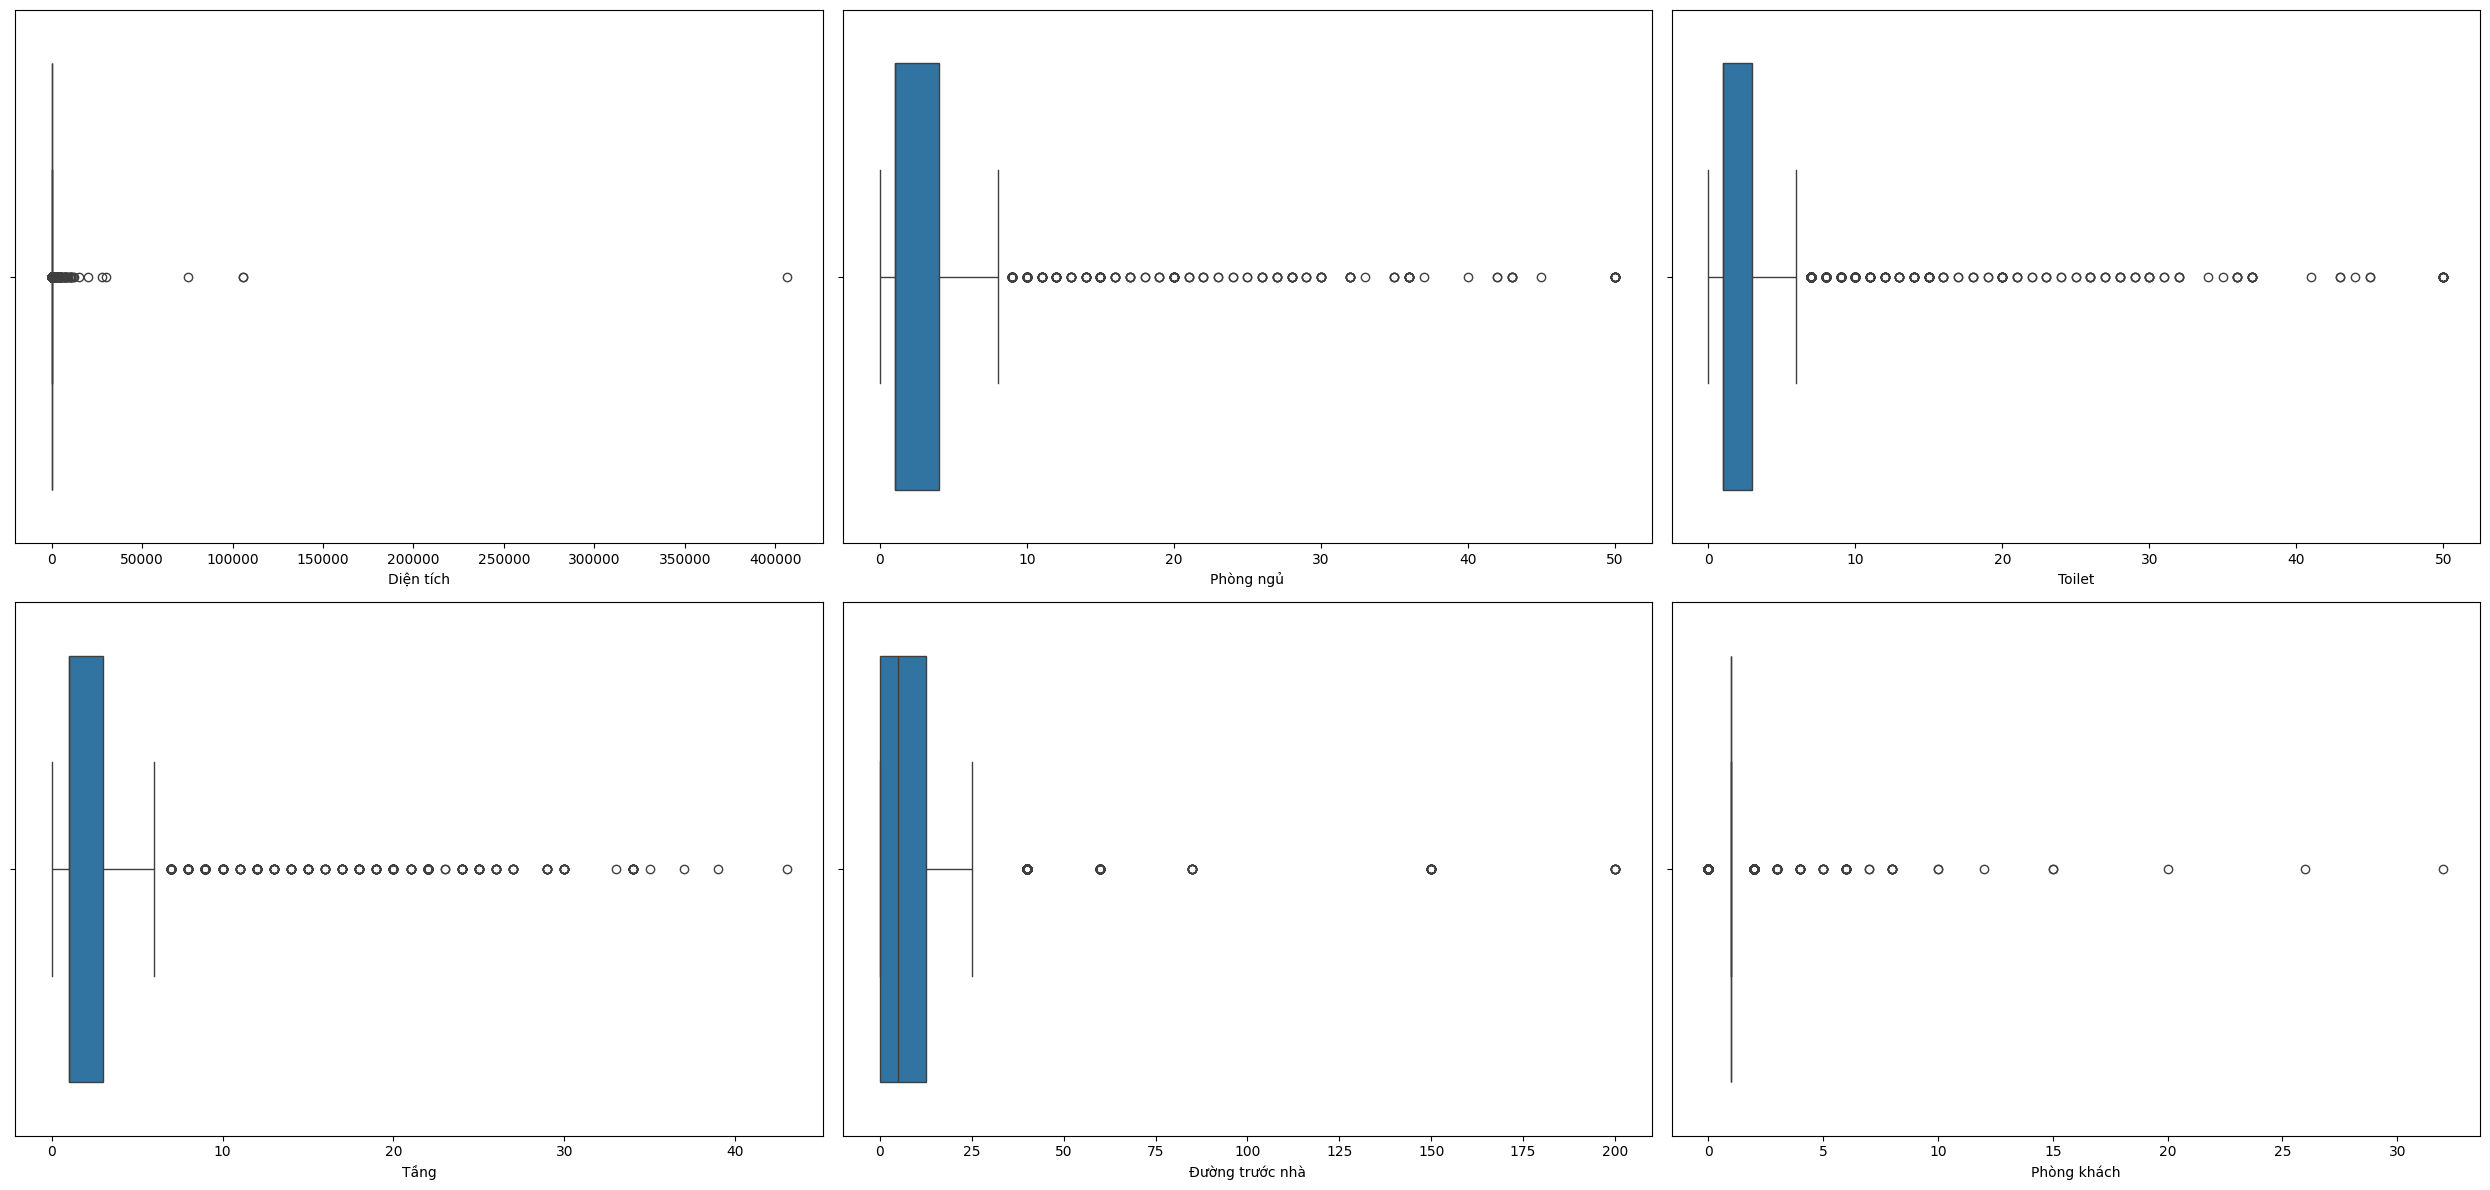

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(25, 12))
i, j = 0, -1
for col in num_cols:
  j += 1
  if j > 2:
    i, j = 1, 0
  sns.boxplot(x=df[col], ax=ax[i][j])
plt.tight_layout()
plt.show()

D·ªØ li·ªáu ch·ª©a kh√° nhi·ªÅu Outlier -> lo·∫°i b·ªè Outlier ·ªü 2 c·ªôt Gi√° v√† Di·ªán t√≠ch v√¨ 2 c·ªôt n√†y ch·ª©u nh·ªØng gi√° tr·ªã qu√° l·ªõn v√† kh√° v√¥ l√Ω. D√πng IQR ƒë·ªÉ lo·∫°i b·ªè outlier l√† nh·ªØng ƒëi·ªÉm d·ªØ li·ªáu nh·ªè h∆°n Q1 v√† l·ªõn h∆°n Q3.

In [ ]:
Q1 = df[['Gi√°','Di·ªán t√≠ch']].quantile(0.1)
Q3 = df[['Gi√°','Di·ªán t√≠ch']].quantile(0.9)
IQR = Q3 - Q1

df = df[~((df[['Gi√°','Di·ªán t√≠ch']] < (Q1 - 1.5 * IQR)) |(df[['Gi√°','Di·ªán t√≠ch']] > (Q3 + 1.5 * IQR))).any(axis=1)]

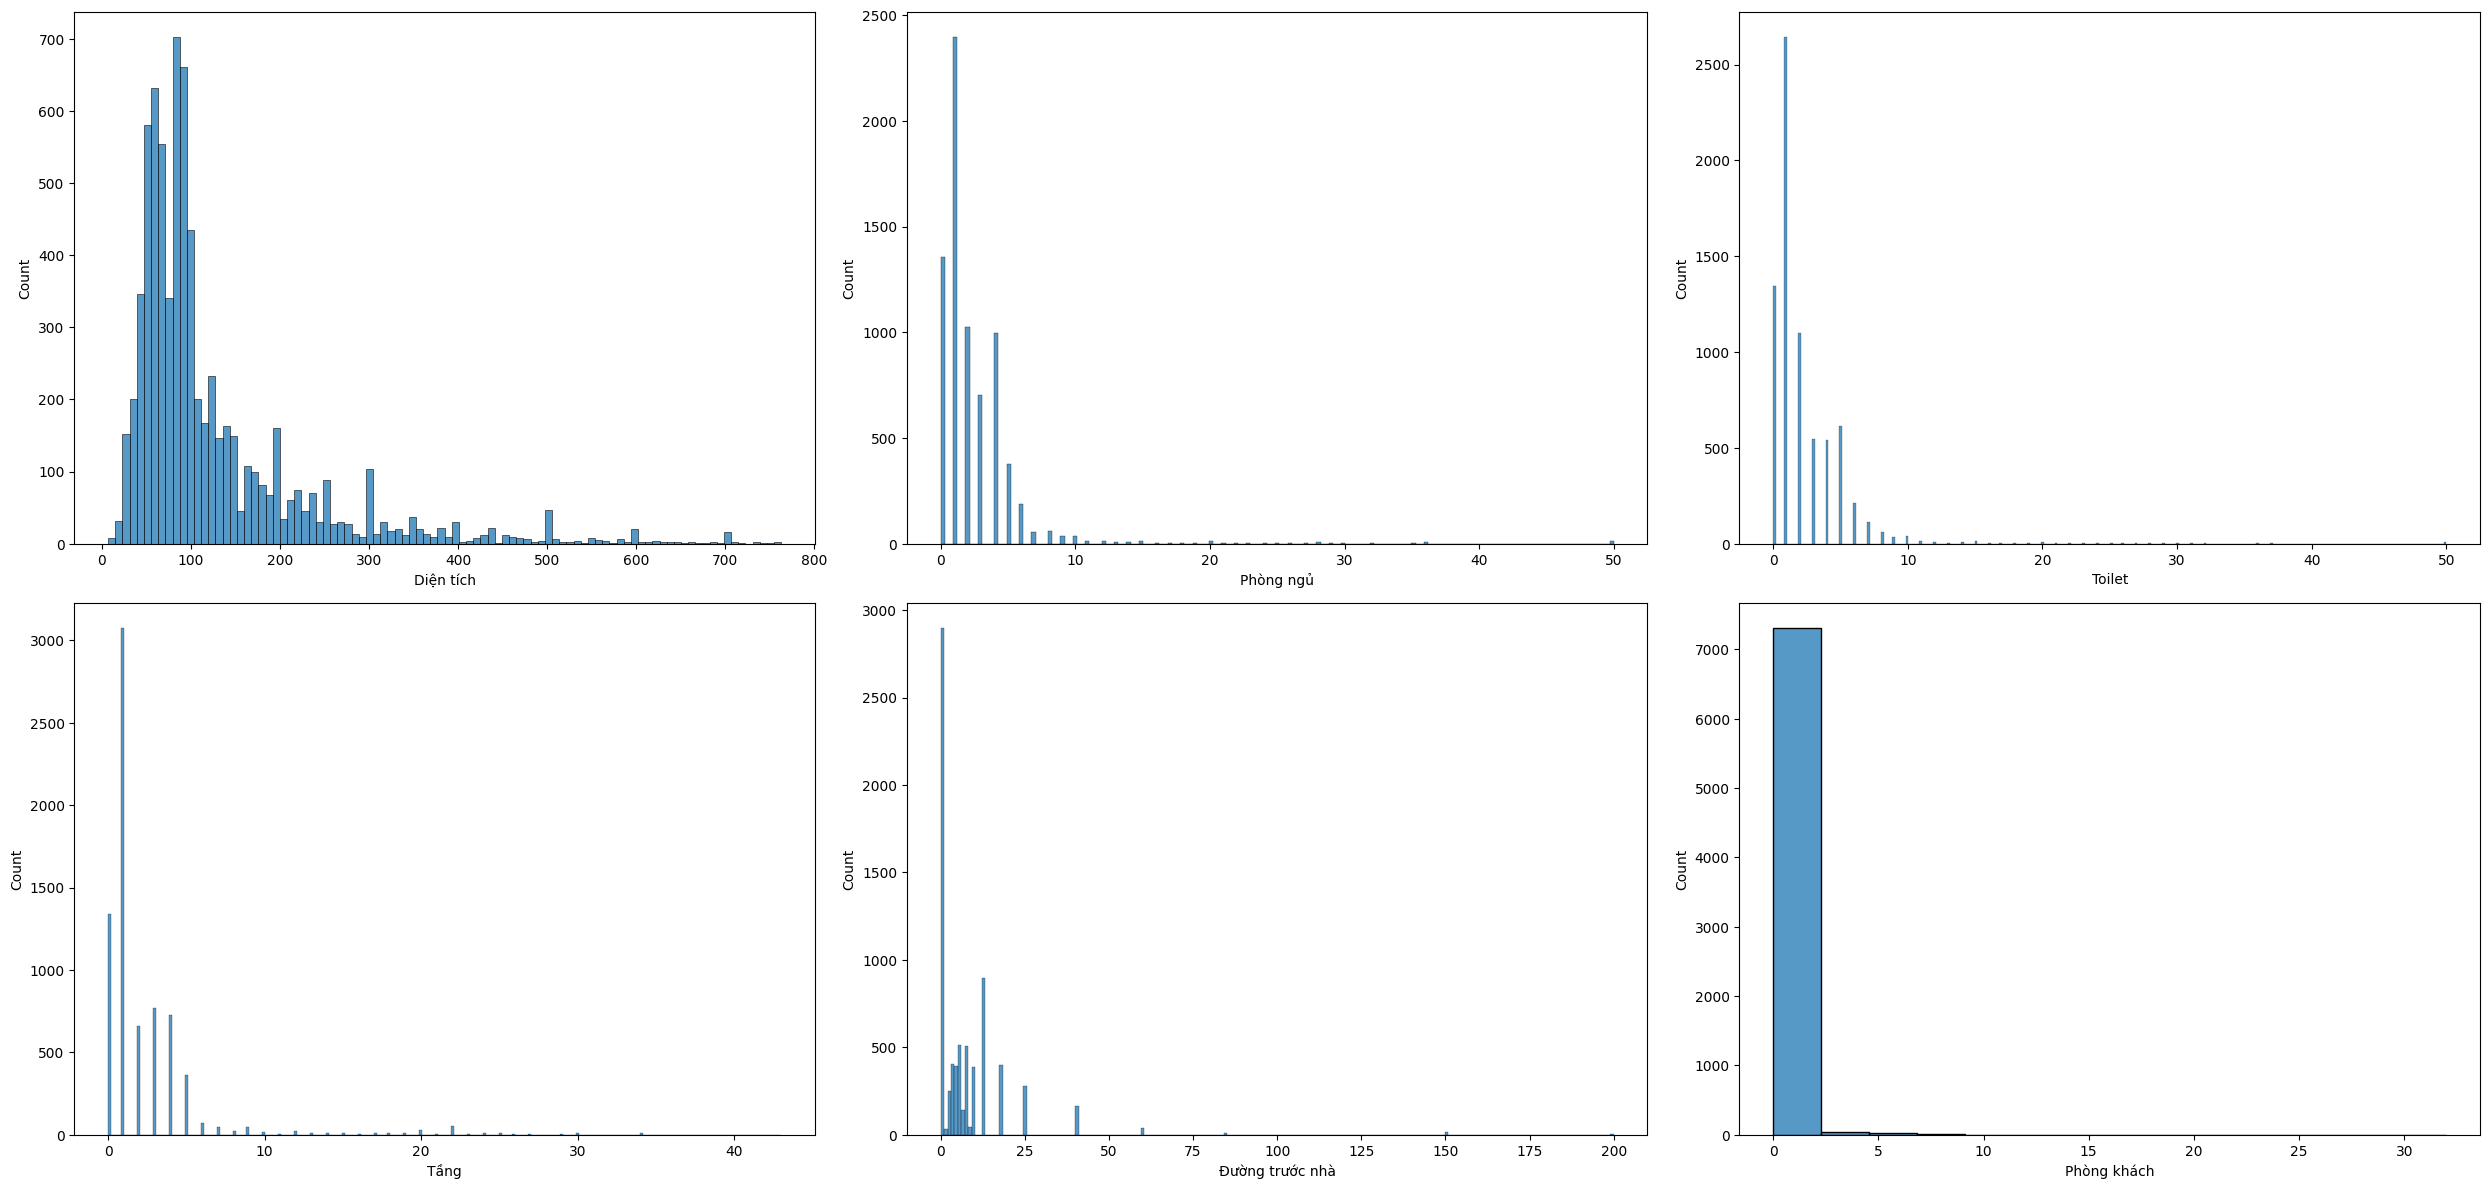

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(25, 12))
i, j = 0, -1
for col in num_cols:
  j += 1
  if j > 2:
    i, j = 1, 0
  sns.histplot(x=df[col], discrete=0, ax=ax[i][j])
plt.tight_layout()
plt.show()

H·∫ßu h·∫øt c√°c c·ªôt ƒë·ªÉu l·ªách v·ªÅ ph√≠a b√™n tr√°i

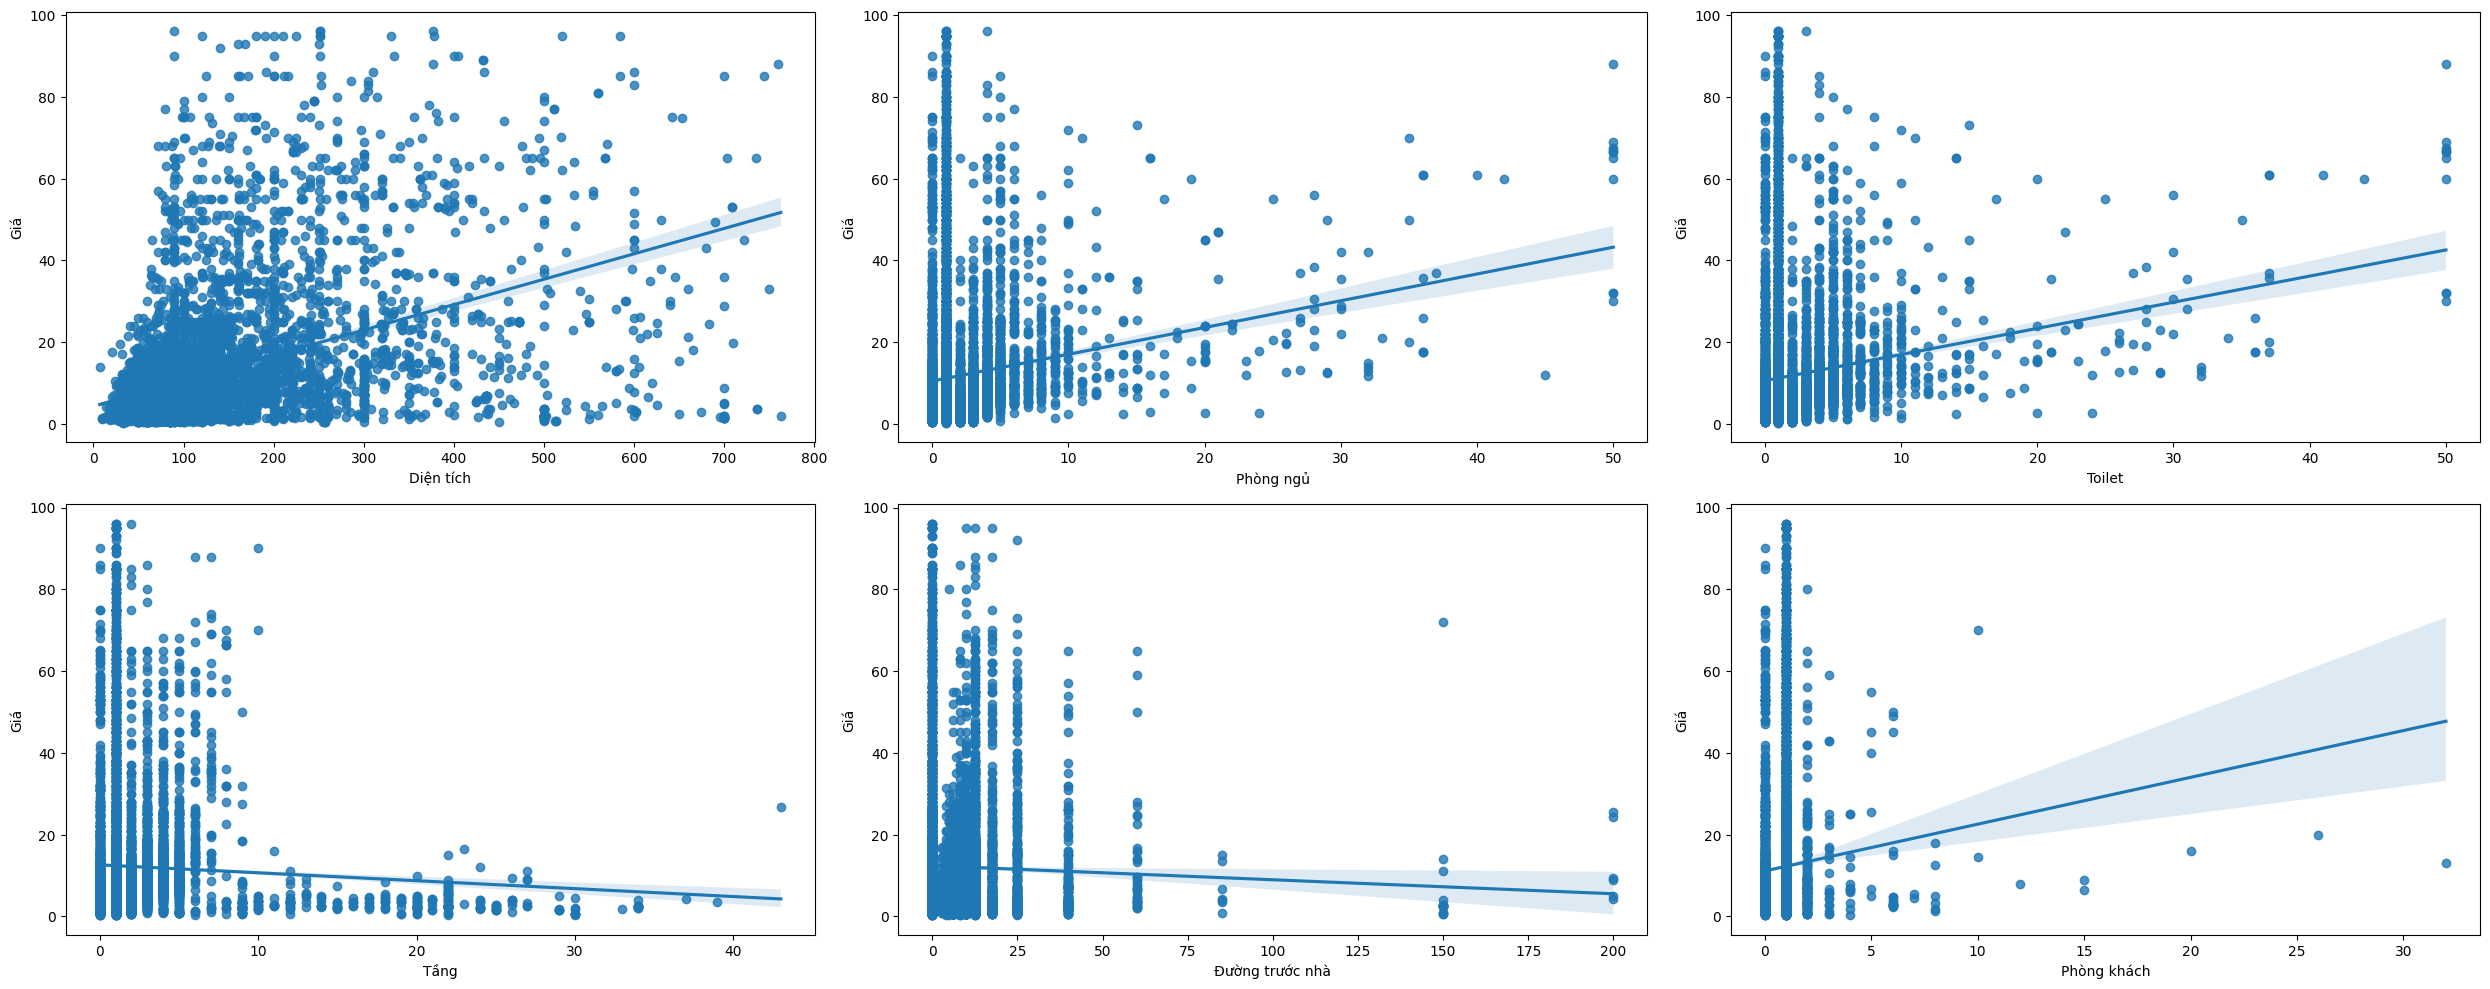

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(25, 10))
i, j = 0, -1
for col in num_cols:
  j += 1
  if j > 2:
    i, j = 1, 0
  sns.regplot(x=df[col], y=df['Gi√°'], ax=ax[i][j])
plt.tight_layout()
plt.show()

- Di·ªán t√≠ch t∆∞∆°ng quan kh√° cao v·ªõi gi√° b·∫•t ƒë·ªông s·∫£n, c√≥ th·ªÉ th·∫•y khi di·ªán t√≠ch tƒÉng l√™n th√¨ gi√° b·∫•t ƒë·ªông s·∫£n c≈©ng tƒÉng l√™n t∆∞∆°ng ·ª©ng.
- S·ªë l∆∞·ª£ng Ph√≤ng ng·ªß v√† Toilet c≈©ng ·∫£nh h∆∞·ªüng kh√° l·ªõn ƒë·∫øn gi√° b·∫•t ƒë·ªông s·∫£n, tuy nhi√™n 2 y·∫øu t·ªë n√†y kh√¥ng c√≥ ƒë·ªô t∆∞∆°ng quan cao nh∆∞ Di·ªán t√≠ch. Nh√¨n v√†o 2 regression plot c·ªßa Ph√≤ng ng·ªß v√† Toilet c√≥ th·ªÉ th·∫•y 2 thu·ªôc t√≠nh n√†y c√≥ s·ª± ph√¢n t√°n d·ªØ li·ªáu kh√° t∆∞∆°ng ƒë·ªìng v√† ƒë∆∞·ªùng h·ªìi quy c·ªßa 2 thu·ªôc t√≠nh c≈©ng kh√° gi·ªëng nhau. ƒêi·ªÅu n√†y cho th·∫•y 2 thu·ªôc t√≠nh n√†y c√≥ s·ª± t∆∞∆°ng quan cao v·ªõi nhau.
- M·ªôt ƒëi·ªÅu kh√° ƒë·∫∑c bi·ªát l√† khi T·∫ßng v√† ƒê∆∞·ªùng tr∆∞·ªõc nh√† tƒÉng l√™n th√¨ gi√° nh√† l·∫°i gi·∫£m xu·ªëng. ƒêi·ªÅu n√†y c√≥ th·ªÉ l√† do khi ng∆∞·ªùi b√°n nh·∫≠p d·ªØ li·ªáu, ng∆∞·ªùi b√°n ch·ªâ mu·ªën b√°n 1 cƒÉn chung c∆∞ trong 1 t√≤a nh√† n√™n gi√° tr·ªã c·ªßa b·∫•t ƒë·ªông s·∫£n ch·ªâ l√† 1 cƒÉn chung c∆∞ nh∆∞ng s·ªë t·∫ßng l·∫°i l√† c·ªßa c·∫£ t√≤a nh√†. V√† v√¨ gi√° tr·ªã c·ªßa 1 cƒÉn chung c∆∞ s·∫Ω th∆∞·ªùng nh·ªè h∆°n nh√† m·∫∑t ƒë·∫•t n√™n ƒë∆∞·ªùng h·ªìi quy m·ªõi c√≥ xu h∆∞·ªõng ƒëi xu·ªëng.
- Thu·ªôc t√≠nh Ph√≤ng kh√°ch c√≥ gi√° tr·ªã t·∫≠p trung ch·ªß y·∫øu trong kho·∫£ng t·ª´ 0 ƒë·∫øn 2 n√™n d√π ƒë∆∞·ªùng h·ªìi quy c√≥ xu h∆∞·ªõng ƒëi l√™n nh∆∞ng ƒë·ªô l·ªói (error) l·∫°i r·∫•t l·ªõn (v√πng m√†u xanh nh·∫°t quanh ƒë∆∞·ªùng h·ªìi quy) n√™n kh√¥ng th·ªÉ kh·∫≥ng ƒë·ªãnh l√† Ph√≤ng kh√°ch t∆∞∆°ng quan nh∆∞ th·∫ø n√†o ƒë·ªëi v·ªõi gi√° b·∫•t ƒë·ªông s·∫£n.

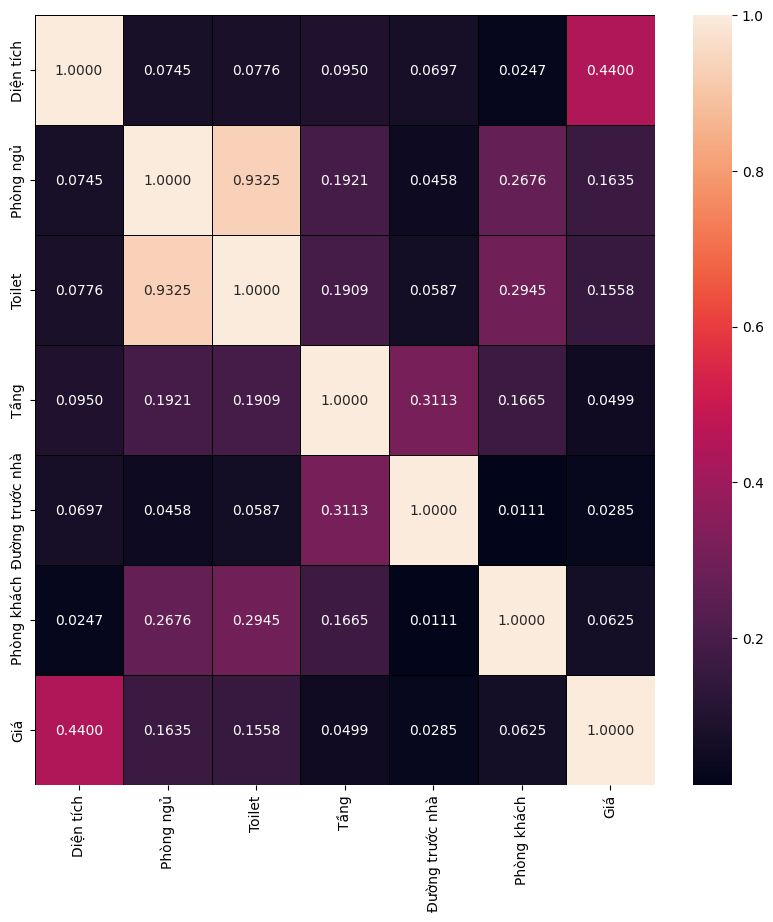

In [ ]:
df_corr = pd.concat([df[num_cols],df[['Gi√°']]], axis=1)
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df_corr.corr().abs(), annot = True, linewidths = 0.5, linecolor = "black", fmt = ".4f")
plt.show()

Heat map th·ªÉ hi·ªán ƒë·ªô t∆∞∆°ng quan c·ªßa c√°c thu·ªôc t√≠nh v·ªõi nhau. K·∫øt qu·∫£ cho th·∫•y Ph√≤ng ng·ªß v√† Toilet t∆∞∆°ng quan r·∫•t cao v·ªõi nhau, tuy nhi√™n ƒë√¢y kh√¥ng ph·∫£i l√† m·ªôt ƒëi·ªÅu t·ªët cho m√¥ h√¨nh h·ªçc m√°y. Hi·ªán t∆∞·ª£ng c√°c bi·∫øn ƒë·ªôc l·∫≠p trong m√¥ h√¨nh h·ªìi qui ph·ª• thu·ªôc tuy·∫øn t√≠nh l·∫´n nhau g·ªçi l√† ƒëa c·ªông tuy·∫øn (Multicollinearity), ƒë·ªÉ kh·∫Øc ph·ª•c hi·ªán t∆∞·ª£ng n√†y c√≥ th·ªÉ b·ªè b·ªõt m·ªôt thu·ªôc t√≠nh (Toilet) v√¨ trong th·ª±c t·∫ø m·ªôt ph√≤ng ng·ªß c√≥ 1 Toilet l√† ƒëi·ªÅu th∆∞·ªùng xuy√™n x·∫£y ra.

<Axes: >

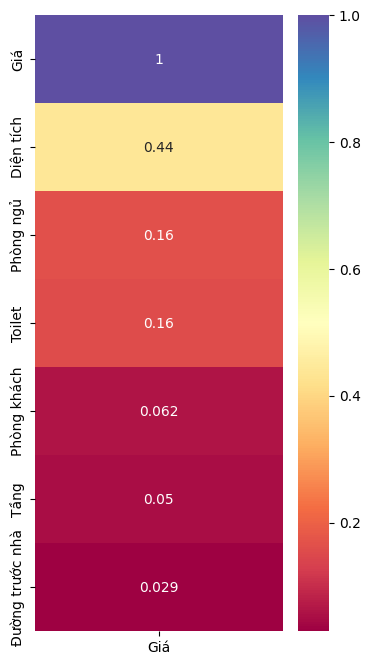

In [ ]:
cor_price=df_corr.corr().abs()[['Gi√°']]
plt.figure(figsize=(4,8))
sns.heatmap(cor_price.sort_values(by='Gi√°', ascending=False), annot=True, cmap = 'Spectral')

Di·ªán t√≠ch c√≥ t∆∞∆°ng quan cao nh·∫•t v·ªõi gi√° nh√† v√† ƒê∆∞·ªùng tr∆∞·ªõc nh√† c√≥ t∆∞∆°ng quan th·∫•p nh·∫•t

## Categorical Feature

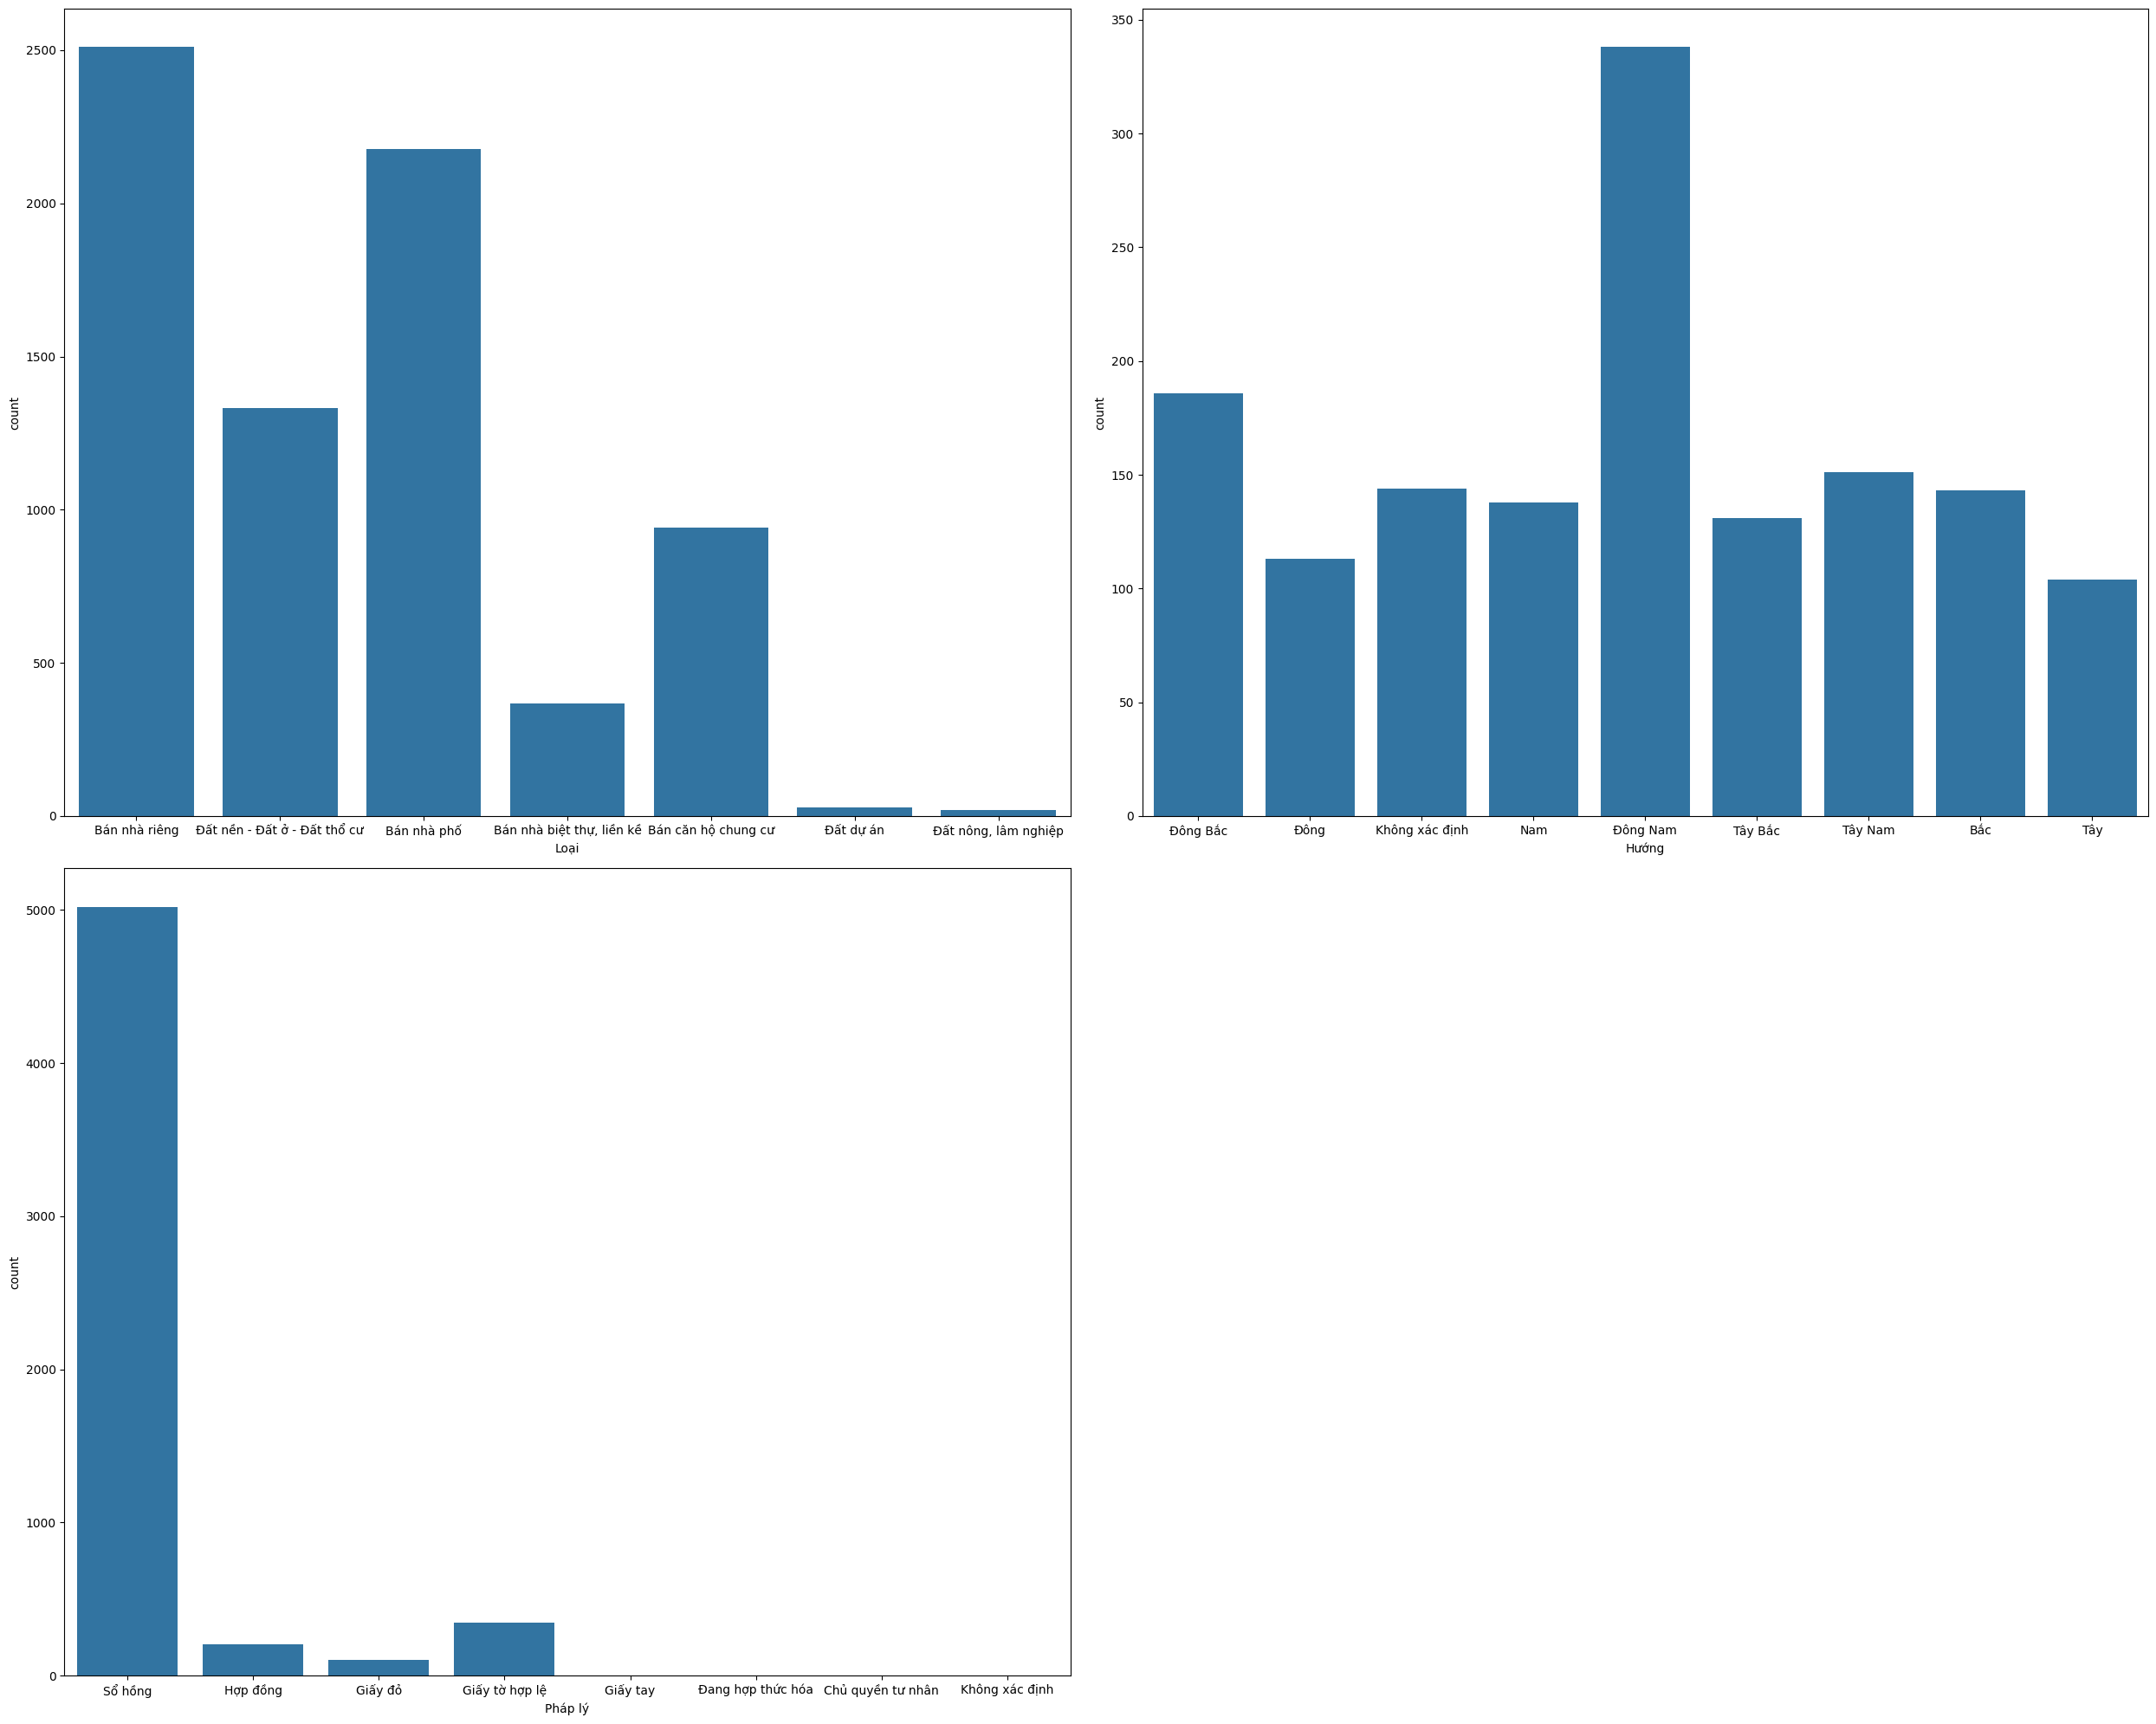

In [ ]:
cate_cols = ['Lo·∫°i', 'H∆∞·ªõng', 'Ph√°p l√Ω']
fig, ax = plt.subplots(2, 2, figsize=(25, 20))
fig.delaxes(ax[1][1])
i, j = 0, -1
for col in cate_cols:
  j += 1
  if j > 1:
    i, j = 1, 0
  sns.countplot(x=df[col], ax=ax[i][j])
plt.tight_layout()
plt.show()

In [ ]:
px.box(y=df['Gi√°'], x=df['Lo·∫°i'])

C√≥ s·ª± kh√°c nhau ƒë√°ng k·ªÉ gi·ªØa c√°c Lo·∫°i b·∫•t ƒë·ªông s·∫£n. ƒê·∫•t n√¥ng, l√¢m nghi·ªáp c√≥ gi√° trung b√¨nh th·∫•p nh·∫•t v√† c≈©ng t·∫≠p trung trong m·ªôt kho·∫£ng r·∫•t nh·ªè t·ª´ 1.4 ƒë·∫øn 2.5 t·ªâ. Ti·∫øp ƒë·∫øn l√† CƒÉn h·ªô chung c∆∞ v√† ƒê·∫•t n·ªÅn - ƒê·∫•t ·ªü - ƒê·∫•t th·ªï c∆∞ v·ªõi gi√° trung b√¨nh kho·∫£ng 3 t·ªâ/BƒêS. ƒê·∫•t n·ªÅn - ƒê·∫•t ·ªü - ƒê·∫•t th·ªï c∆∞ m·∫∑c d√π gi√° t·∫≠p chung trong kho·∫£ng Q1 v√† Q3 cao h∆°n CƒÉn h·ªô chung c∆∞ (1.65 t·ª∑ ƒë·∫øn 8.3 t·ª∑ so v·ªõi 2 t·ª∑ ƒë·∫øn 5 t·ª∑) nh∆∞ng gi√° tr·ªã trung v·ªã c·ªßa CƒÉn h·ªô chung c∆∞ l·∫°i cao h∆°n (3.3 t·ª∑ so v·ªõi 2.9 t·ª∑). Nh√† bi·ªát th·ª±, li·ªÅn k·ªÅ c√≥ gi√° tr·ªã cao nh·∫•t v·ªõi gi√° tr·ªã trung v·ªã l√† 25 t·ª∑, ti·∫øp ƒë·∫øn l√† nh√† ph·ªë v·ªõi trung v·ªã l√† 10.5 t·ª∑. C·∫£ 2 lo·∫°i b·∫•t ƒë·ªông s·∫£n n√†y ƒë·ªÅu c√≥ nh·ªØng cƒÉn nh√† l√™n ƒë·∫øn 96 t·ª∑.

In [ ]:
px.box(y=df['Gi√°'], x=df['Ph√°p l√Ω'])

Nh·ªØng b·∫•t ƒë·ªông s·∫£n c√≥ gi·∫•y t·ªù uy t√≠n h∆°n th√¨ gi√° c≈©ng cao h∆°n. Nh·ªØng b·∫•t ƒë·ªông s·∫£n c√≥ gi·∫•y tay v√† ƒëang h·ª£p th·ª©c h√≥a c√≥ gi√° th·∫•p nh·∫•t. Ng∆∞·ª£c l·∫°i, Gi·∫•y ƒë·ªè v√† S·ªï h·ªìng c√≥ gi√° tr·ªã cao nh·∫•t.

In [ ]:
px.box(y=df['Gi√°'], x=df['H∆∞·ªõng'])

Gi√° tr·ªã c·ªßa b·∫•t ƒë·ªông s·∫£n theo c√°c H∆∞·ªõng kh√°c nhau kh√¥ng c√≥ s·ª± kh√°c bi·ªát ƒë√°ng k·ªÉ, ƒë√¢y c≈©ng l√† thu·ªôc t√≠nh ch·ª©a r·∫•t nhi·ªÅu missing value (>80%) n√™n c≈©ng kh√¥ng c√≥ gi√° tr·ªã ph√¢n t√≠ch.

-

In [ ]:
px.box(x=df['Qu·∫≠n/Huy·ªán'], y=df['Gi√°'])

Gi√° b·∫•t ƒë·ªông s·∫£n c≈©ng c√≥ s·ª± kh√°c nhau gi·ªØa c√°c Qu·∫≠n/Huy·ªán. Gi√° nh√† cao nh·∫•t ·ªü 2 qu·∫≠n trung t√¢m th√†nh ph·ªë l√† qu·∫≠n 1 v√† qu·∫≠n 3. Th√†nh ph·ªë Th·ªß ƒê·ª©c (bao g·ªìm qu·∫≠n 2, qu·∫≠n 9 v√† qu·∫≠n Th·ªß ƒê·ª©c) l√† v√πng ngo√†i c·ªßa Th√†nh ph·ªë nh∆∞ng l·∫°i c√≥ gi√° b·∫•t ƒë·ªông s·∫£n trung b√¨nh ngang v·ªõi c√°c qu·∫≠n trung t√¢m kh√°c nh∆∞ qu·∫≠n 10, qu·∫≠n 3 v√† qu·∫≠n 7.

In [ ]:
color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df,
                        lat="Vƒ© ƒë·ªô",
                        lon="Kinh ƒë·ªô",
                        hover_data=["Gi√°"],
                        color="Gi√°",
                        color_continuous_scale=color_scale,
                        size="Gi√°",
                        size_max=10,
                        zoom=8,
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Bi·ªÉu di·ªÖn BƒêS l√™n b·∫£n ƒë·ªì VN, m·ªói ƒëi·ªÉm l√† 1 BƒêS v√† k√≠ch th∆∞·ªõc c·ªßa ƒëi·ªÉm l√† gi√° c·ªßa BƒêS ƒë√≥. C√≥ th·ªÉ th·∫•y nh·ªØng BƒêS ƒë·∫Øt ti·ªÅn nh·∫•t t·∫≠p trung ·ªü khu v·ª±c Th·∫£o ƒêi·ªÅn - An Ph√∫ - An Kh√°nh v√† nh·ªØng khu v·ª±c xung quanh ga D√¢n Ch·ªß.  

# Hypothesis Testing

In [ ]:
X_num = df[num_cols]
y_num = df['Gi√°']
from sklearn.feature_selection import f_regression
F_score, p_value = f_regression(X_num, y_num)

cont_pearson = pd.DataFrame([F_score,p_value], index=['F-score','p-value'], columns=X_num.columns).T
cont_pearson.sort_values(by='p-value')

F-score       p-value
Di·ªán t√≠ch        1770.332722  0.000000e+00
Ph√≤ng ng·ªß         202.496959  2.364101e-45
Toilet            183.381941  2.750332e-41
Ph√≤ng kh√°ch        28.893181  7.882301e-08
T·∫ßng               18.402060  1.811475e-05
ƒê∆∞·ªùng tr∆∞·ªõc nh√†     6.012980  1.422404e-02

In [ ]:
df['Ph√°p l√Ω'].fillna(df['Ph√°p l√Ω'].mode()[0], inplace=True)

In [ ]:
cate_cols = ['Ph√°p l√Ω', 'Qu·∫≠n/Huy·ªán']

In [ ]:
from sklearn.feature_selection import f_classif
ANOVA, p_value = zip(*[f_classif(df[['Gi√°']], df[cols]) for cols in cate_cols])
ANOVA_values = [result[0] for result in ANOVA]
p_value_values = [result[0] for result in p_value]
df_ANOVA = pd.DataFrame({'feaute':cate_cols,"ANOVA":ANOVA_values, "p_value":p_value_values})

In [ ]:
df_ANOVA

feaute      ANOVA        p_value
0     Ph√°p l√Ω   5.588724   1.928190e-06
1  Qu·∫≠n/Huy·ªán  83.785991  3.013800e-322

# X√¢y d·ª±ng m√¥ h√¨nh h·ªçc m√°y

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in cate_cols:
    le = LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])
    label_encoders[col] = le

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
from sklearn.model_selection import train_test_split
X = pd.concat([df[num_cols],df[cate_cols]], axis = 1)
y = df['Gi√°']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
pip install lazypredict -qq

In [ ]:
from lazypredict.Supervised import LazyRegressor

In [ ]:
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 33/42 [00:35<00:06,  1.46it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:42<00:00,  1.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000763 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 6639, number of used features: 8
[LightGBM] [Info] Start training from score 12.179592


In [ ]:
lazy_models = models
lazy_models

Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
LGBMRegressor                                0.64       0.64    8.88   
XGBRegressor                                 0.62       0.63    9.07   
HistGradientBoostingRegressor                0.62       0.62    9.10   
RandomForestRegressor                        0.61       0.61    9.20   
BaggingRegressor                             0.59       0.59    9.44   
ExtraTreesRegressor                          0.58       0.58    9.58   
GradientBoostingRegressor                    0.55       0.56    9.86   
KNeighborsRegressor                          0.46       0.47   10.79   
DecisionTreeRegressor                        0.40       0.41   11.41   
MLPRegressor                                 0.39       0.39   11.54   
ExtraTreeRegressor                           0.36       0.37   11.80   
AdaBoostRegressor                            0.20       0.21   13.14   
NuSVR                                        0.20       0.21   13.16   
LassoLarsIC                                  0.20       0.21   13.21   
LassoCV                                      0.20       0.20   13.21   
LarsCV                                       0.20       0.20   13.21   
LassoLarsCV                                  0.20       0.20   13.21   
TransformedTargetRegressor                   0.20       0.20   13.21   
LinearRegression                             0.20       0.20   13.21   
Lars                                         0.20       0.20   13.21   
Ridge                                        0.20       0.20   13.21   
RidgeCV                                      0.20       0.20   13.21   
BayesianRidge                                0.20       0.20   13.21   
ElasticNetCV                                 0.20       0.20   13.22   
OrthogonalMatchingPursuitCV                  0.19       0.20   13.24   
SGDRegressor                                 0.19       0.20   13.25   
LassoLars                                    0.18       0.19   13.31   
Lasso                                        0.18       0.19   13.31   
SVR                                          0.18       0.19   13.32   
OrthogonalMatchingPursuit                    0.18       0.19   13.36   
ElasticNet                                   0.16       0.17   13.49   
PoissonRegressor                             0.15       0.16   13.55   
TweedieRegressor                             0.15       0.16   13.61   
GammaRegressor                               0.14       0.15   13.66   
HuberRegressor                               0.13       0.14   13.71   
LinearSVR                                    0.11       0.12   13.88   
DummyRegressor                              -0.01      -0.00   14.82   
RANSACRegressor                             -0.24      -0.23   16.42   
PassiveAggressiveRegressor                  -0.25      -0.24   16.50   
KernelRidge                                 -0.52      -0.51   18.19   
GaussianProcessRegressor               -129468.29 -128062.93 5301.61   

                               Time Taken  
Model                                      
LGBMRegressor                        0.22  
XGBRegressor                         1.24  
HistGradientBoostingRegressor        0.38  
RandomForestRegressor                1.78  
BaggingRegressor                     0.19  
ExtraTreesRegressor                  1.33  
GradientBoostingRegressor            0.51  
KNeighborsRegressor                  0.07  
DecisionTreeRegressor                0.10  
MLPRegressor                         8.29  
ExtraTreeRegressor                   0.03  
AdaBoostRegressor                    0.15  
NuSVR                                2.08  
LassoLarsIC                          0.03  
LassoCV                              0.12  
LarsCV                               0.04  
LassoLarsCV                          0.04  
TransformedTargetRegressor           0.02  
LinearRegression                     0.04  
Lars      

K·∫øt qu·∫£ cho th·∫•y m√¥ h√¨nh LGBM ho·∫°t ƒë·ªông t·ªët nh·∫•t khi so s√°nh ·ªü baseline -> D√πng LGBM ƒë·ªÉ train v√† tunning

In [ ]:
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000928 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 405
[LightGBM] [Info] Number of data points in the train set: 6639, number of used features: 8
[LightGBM] [Info] Start training from score 12.179592


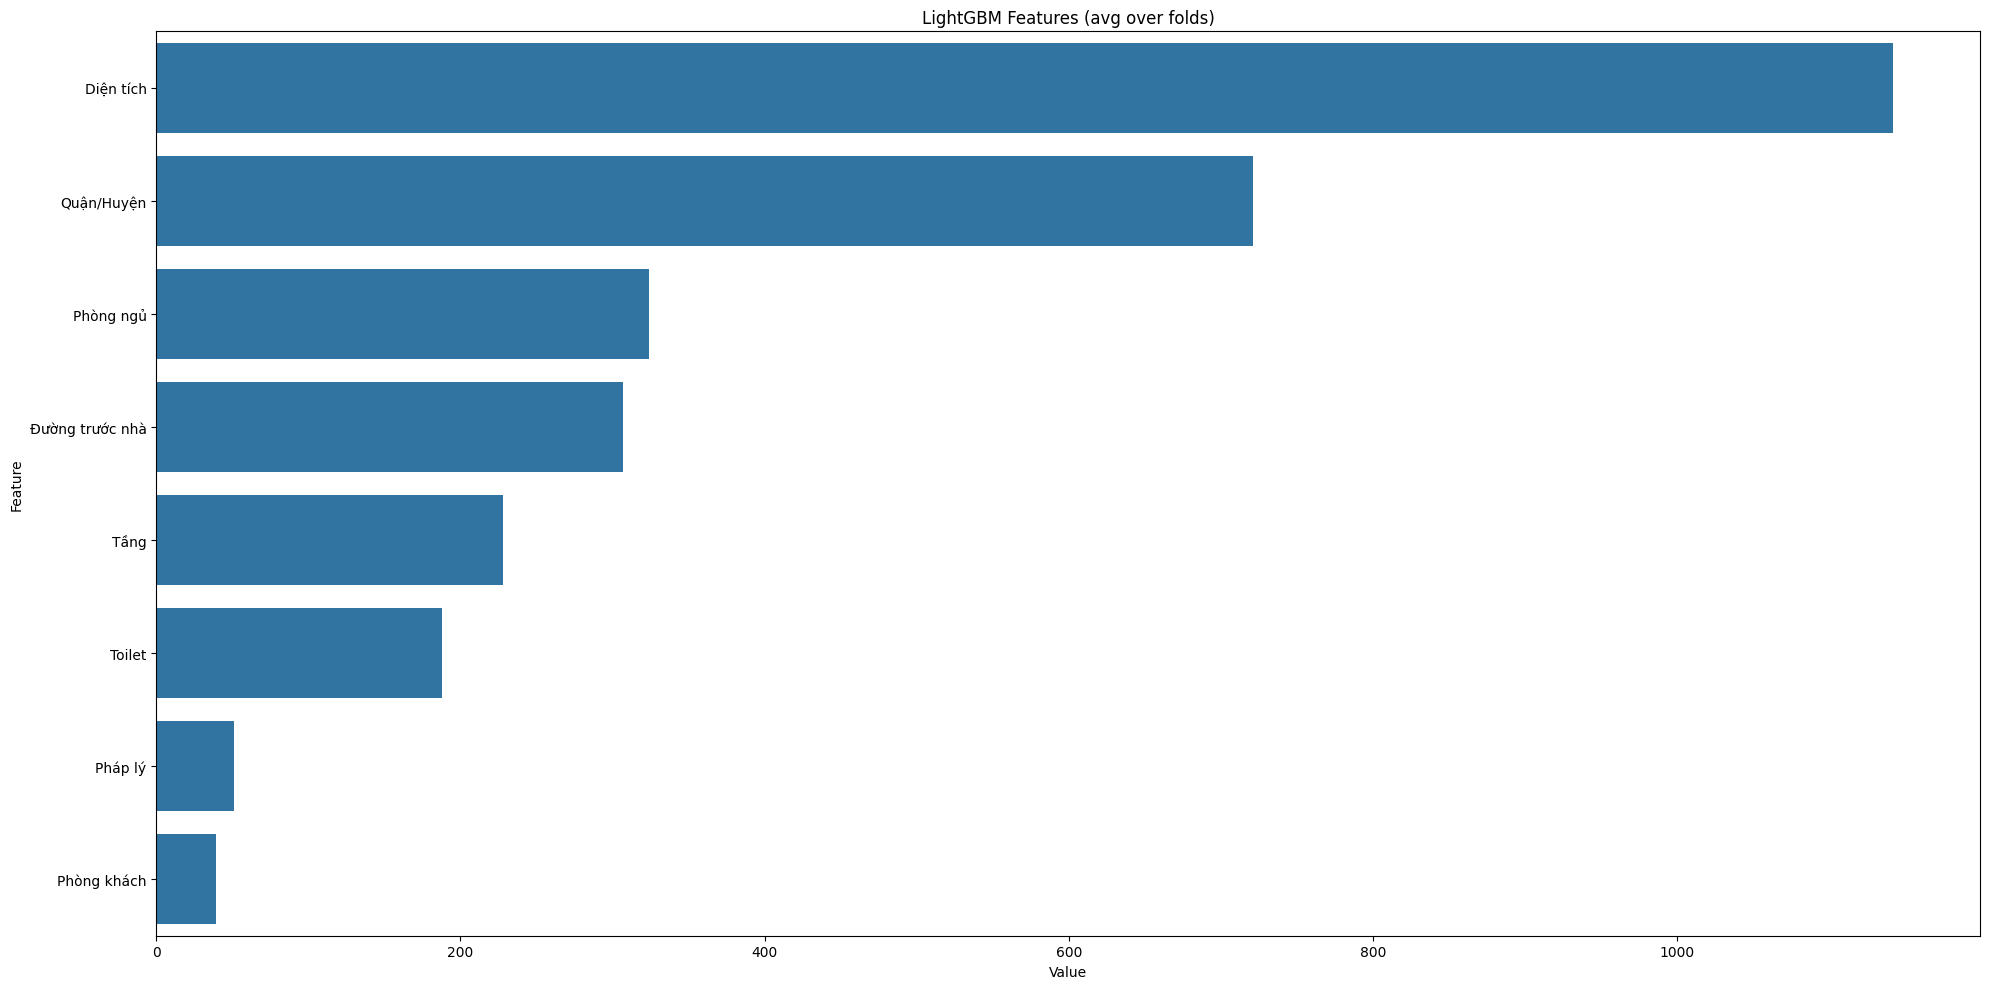

<Figure size 640x480 with 0 Axes>

In [ ]:
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

C√≥ nh·ªØng feature c√≥ ·∫£nh h∆∞·ªüng r·∫•t th·∫•p ƒë·∫øn m√¥ h√¨nh n√™n c·∫ßn ph·∫£i xem x√©t lo·∫°i b·ªè nh·ªØng feature n√†y. ƒêi·ªÅu n√†y c√≥ th·ªÉ l√†m cho m√¥ h√¨nh gi·∫£m th·ªùi gian t√≠nh to√°n m√† kh√¥ng l√†m gi·∫£m ƒë·ªô ch√≠nh x√°c c·ªßa m√¥ h√¨nh qu√° nhi·ªÅu ho·∫∑c ƒë√¥i khi c√≥ th·ªÉ tƒÉng ƒë·ªô ch√≠nh x√°c c·ªßa m√¥ h√¨nh.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

mean_squared_error_list = []
mean_absolute_error_list = []
r2_score_list = []
rm_list = ['Ph√°p l√Ω','Ph√≤ng kh√°ch','Toilet','T·∫ßng','ƒê∆∞·ªùng tr∆∞·ªõc nh√†','Ph√≤ng ng·ªß','Qu·∫≠n/Huy·ªán']
rm_list_current = []
for col in rm_list:
  X_new = X_train.drop(columns = rm_list_current)
  lgbm_new = LGBMRegressor()
  lgbm_new.fit(X_new, y_train)
  y_pred_new = lgbm_new.predict(X_test.drop(columns = rm_list_current))

  mean_squared_error_list.append(mean_squared_error(y_pred_new, y_test))
  mean_absolute_error_list.append(mean_absolute_error(y_pred_new, y_test))
  r2_score_list.append(r2_score(y_pred_new, y_test))
  rm_list_current.append(col)

df_result = pd.DataFrame({"Feature":rm_list,
                          "MSE": mean_squared_error_list,
                          "MAE": mean_absolute_error_list,
                          "R2": r2_score_list
                          })


In [ ]:
df_result

Feature   MSE  MAE   R2
0          Ph√°p l√Ω 81.38 4.95 0.41
1      Ph√≤ng kh√°ch 82.87 4.98 0.40
2           Toilet 82.83 4.99 0.40
3             T·∫ßng 85.09 5.05 0.38
4  ƒê∆∞·ªùng tr∆∞·ªõc nh√† 85.89 5.12 0.38
5        Ph√≤ng ng·ªß 86.03 5.30 0.34
6       Qu·∫≠n/Huy·ªán 99.75 5.87 0.18

C√≥ 3 thu·ªôc t√≠nh sau khi lo·∫°i b·ªè th√¨ hi·ªáu xu·∫•t c·ªßa m√¥ h√¨nh kh√¥ng thay ƒë·ªïi qu√° nhi·ªÅu l√† Ph√°p l√Ω, Ph√≤ng kh√°ch, Toilet n√™n 3 thu·ªôc t√≠nh n√†y s·∫Ω ƒë∆∞·ª£c lo·∫°i b·ªè ƒë·ªÉ gi·∫£m th·ªùi gian t√≠nh to√°n c·ªßa m√¥ h√¨nh.

<Axes: >

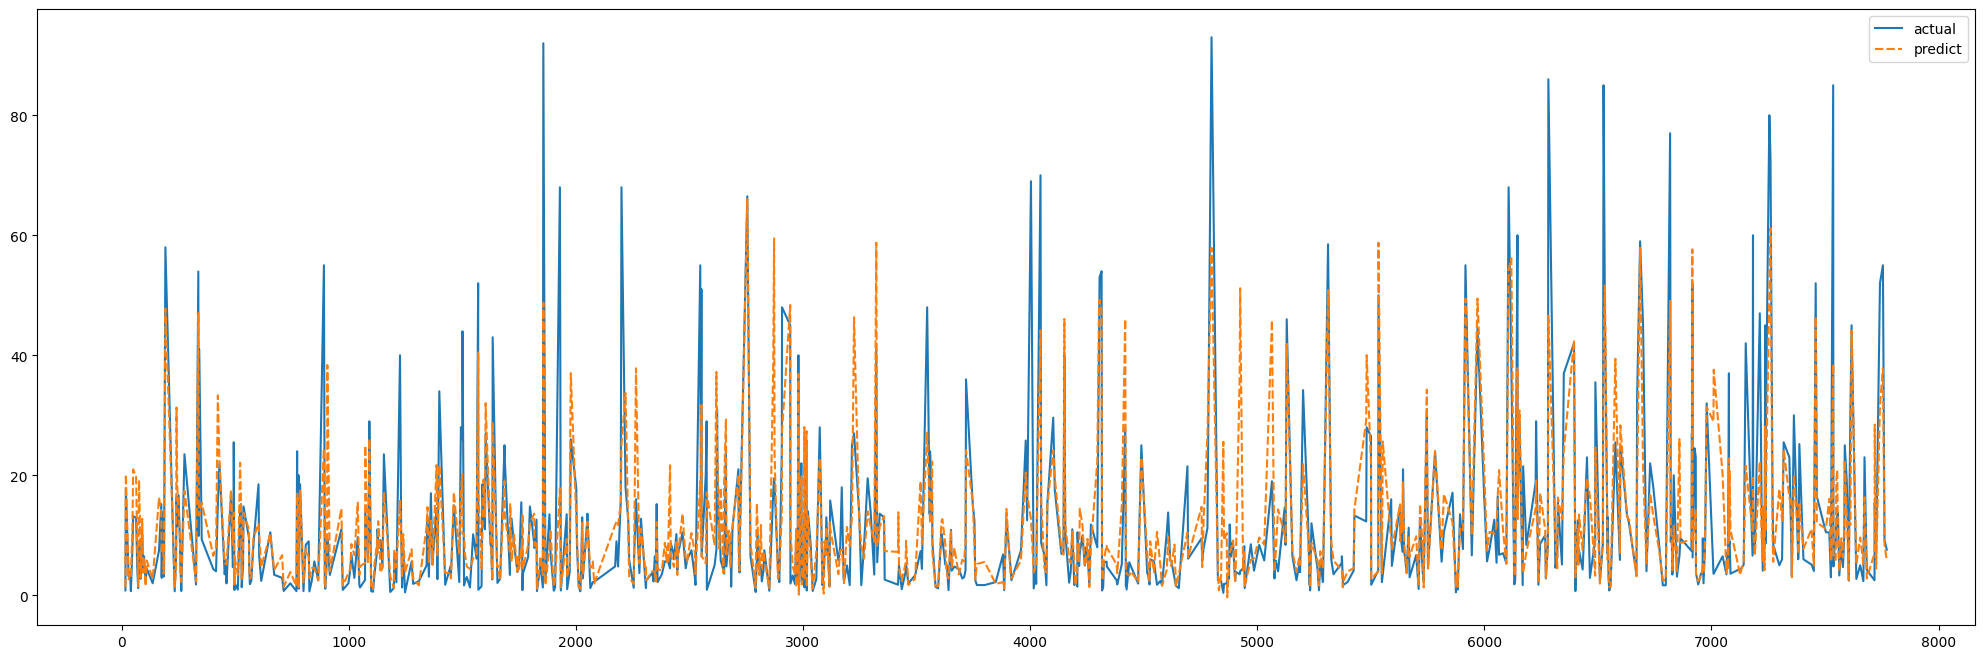

In [ ]:
df_predict = pd.DataFrame({"actual":y_test, "predict":y_pred})
plt.figure(figsize=(25, 8))
sns.lineplot(data=df_predict)

K·∫øt qu·∫£ d·ª± ƒëo√°n c√≥ c√πng h√¨nh d·∫°ng v·ªõi gi√° tr·ªã th·ª±c t·∫ø, tuy nhi√™n ƒë·ªô ch√™nh l·ªánh c√≤n kh√° cao

<Axes: ylabel='error'>

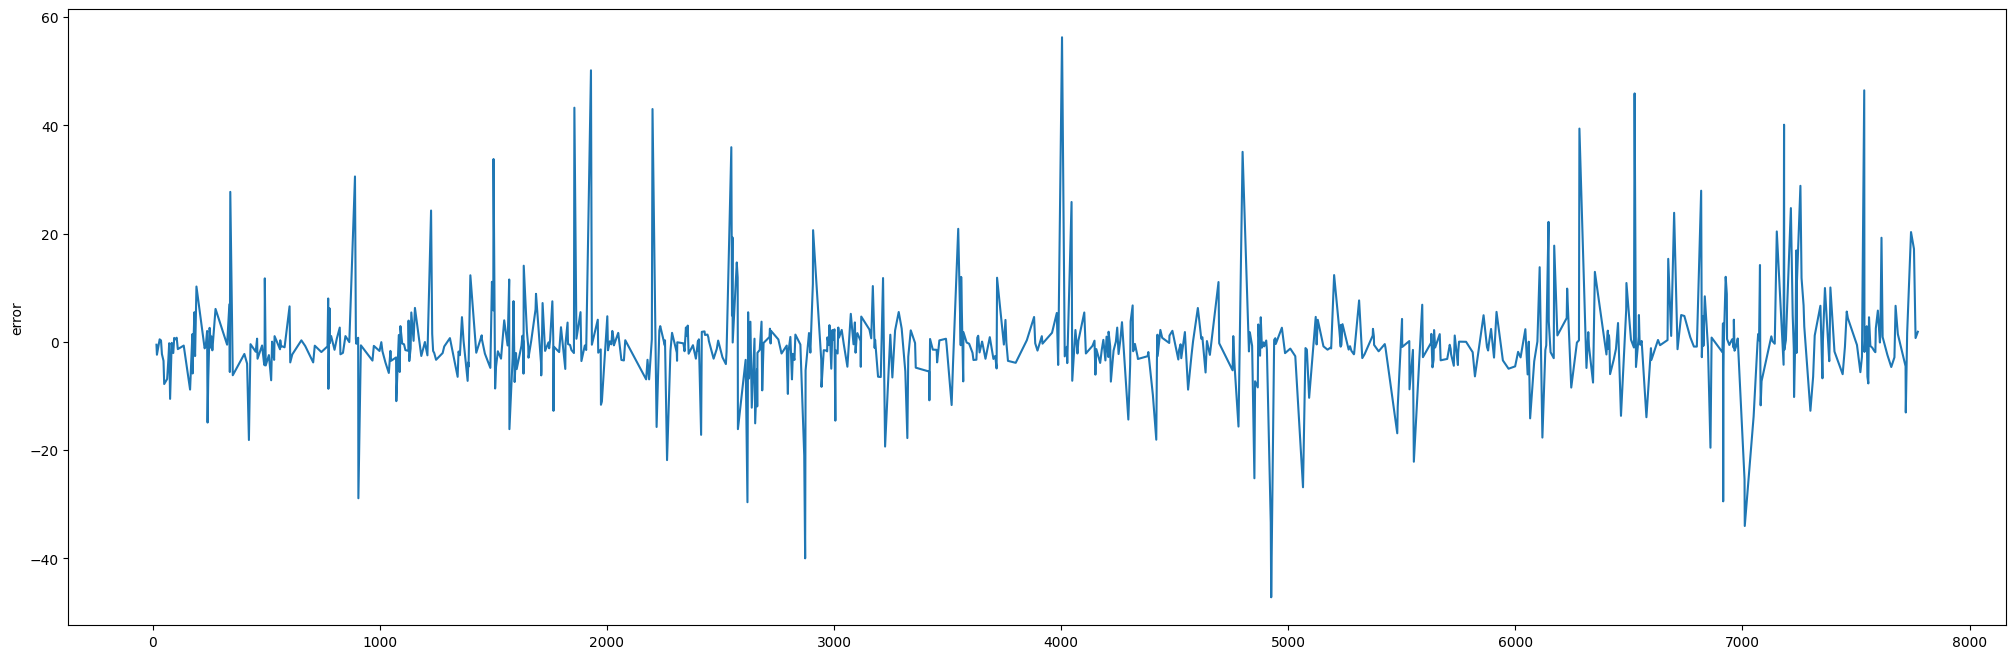

In [ ]:
df_predict['error'] = y_test - y_pred
plt.figure(figsize=(25, 8))
sns.lineplot(data=df_predict['error'])

Ki·ªÉm tra xem nh·ªØng d√≤ng d·ªØ li·ªáu b·ªã d·ª± ƒëo√°n sai nhi·ªÅu nh·∫•t c√≥ ƒë·∫∑c ƒëi·ªÉm nh∆∞ th·∫ø n√†o

In [ ]:
df_predict.sort_values(by='error', inplace=True)
df_predict.head()

actual  predict  error
4925    4.00    51.17 -47.17
2873   19.50    59.48 -39.98
7010    3.60    37.60 -34.00
4923    3.50    36.91 -33.41
2619    7.60    37.21 -29.61

5 d√≤ng c√≥ gi√° th·∫•p nh∆∞ng m√¥ h√¨nh d·ª± ƒëoan gi√° cao

In [ ]:
df.loc[df_predict.head().index]

Gi√°  Di·ªán t√≠ch  Ph√≤ng ng·ªß                          Lo·∫°i     H∆∞·ªõng  \
4925  4.00     120.00          1           B√°n cƒÉn h·ªô chung c∆∞       NaN   
2873 19.50     200.00          1                 B√°n nh√† ri√™ng       NaN   
7010  3.60     500.00          0  ƒê·∫•t n·ªÅn - ƒê·∫•t ·ªü - ƒê·∫•t th·ªï c∆∞       NaN   
4923  3.50      80.00          1           B√°n cƒÉn h·ªô chung c∆∞       NaN   
2619  7.60     250.00          5                   B√°n nh√† ph·ªë  ƒê√¥ng B·∫Øc   

      T·∫ßng  Toilet  ƒê∆∞·ªùng tr∆∞·ªõc nh√†  Ph√≤ng kh√°ch  Ph√°p l√Ω   Ng√†y ƒëƒÉng  \
4925     1       1             0.00            1        6  12-09-2022   
2873     1       1             0.00            1        6  30-09-2022   
7010     0       0            12.50            0        6  12-08-2022   
4923     1       1             0.00            1        6  12-09-2022   
2619     3       5            12.50            1        6  03-10-2022   

                                                  M√¥ t·∫£  CƒÉn h·ªô  Vƒ© ƒë·ªô  \
4925  C·∫ßn b√°n cƒÉn h·ªô cao c·∫•p n·∫±m m·∫∑t ti·ªÅn Nguy·ªÖn H·ªØu...       1  10.79   
2873  ü§© NH√Ä QU·∫¨N 1 ƒê∆Ø·ªúNG L√ä TH·ªä RI√äNG - P \r\nB·∫æN TH...       1  10.78   
7010  b√°n si√™u ph·∫©m bi·ªát th·ª± ngh·ªâ d∆∞·ª°ng v·ªã tr√≠ ƒë·∫Øc ƒë...       0  10.88   
4923  D·ª± √°n cƒÉn h·ªô m·ªõi t·∫°i khu Nam S√†i G√≤n, to·∫° l·∫°c ...       1  10.78   
2619  Duy nh·∫•t ch·ªâ 24 cƒÉn ƒë·ªôc t√¥n ( ch·ªâ c√≤n 5 cƒÉn du...       1  10.86   

      Kinh ƒë·ªô  Qu·∫≠n/Huy·ªán  
4925   106.69           9  
2873   106.70           5  
7010   106.73          21  
4923   106.70           5  
2619   106.72          21

In [ ]:
df_predict.tail()

actual  predict  error
1857   92.00    48.74  43.26
6525   85.00    39.11  45.89
7536   85.00    38.54  46.46
1930   68.00    17.84  50.16
4004   69.00    12.74  56.26

5 d√≤ng c√≥ gi√° cao nh∆∞ng m√¥ h√¨nh d·ª± ƒëo√°n th·∫•p

In [ ]:
df.loc[df_predict.tail().index]

Gi√°  Di·ªán t√≠ch  Ph√≤ng ng·ªß                          Lo·∫°i H∆∞·ªõng  T·∫ßng  \
1857 92.00     140.00          1                   B√°n nh√† ph·ªë   NaN     1   
6525 85.00     200.00          1                   B√°n nh√† ph·ªë   NaN     1   
7536 85.00     744.00          0  ƒê·∫•t n·ªÅn - ƒê·∫•t ·ªü - ƒê·∫•t th·ªï c∆∞   NaN     0   
1930 68.00     234.00          1                   B√°n nh√† ph·ªë   NaN     1   
4004 69.00     350.00          0  ƒê·∫•t n·ªÅn - ƒê·∫•t ·ªü - ƒê·∫•t th·ªï c∆∞   NaN     1   

      Toilet  ƒê∆∞·ªùng tr∆∞·ªõc nh√†  Ph√≤ng kh√°ch  Ph√°p l√Ω   Ng√†y ƒëƒÉng  \
1857       1            25.00            1        6  08-10-2022   
6525       1             0.00            1        6  19-08-2022   
7536       0             0.00            0        6  04-08-2022   
1930       1            12.50            1        6  14-10-2022   
4004       0            17.50            0        6  21-09-2022   

                                                  M√¥ t·∫£  CƒÉn h·ªô  Vƒ© ƒë·ªô  \
1857  - Ch√≠nh ch·ªß b√°n to√† nh√† m·∫∑t ti·ªÅn ƒë∆∞·ªùng Nguy·ªÖn ...       1  10.79   
6525  B√°n nh√† m·∫∑t ti·ªÅn ƒë∆∞·ªùng Song H√†nh, ph∆∞·ªùng An Ph...       1  10.80   
7536  BDS H√πng Vƒ© Land [NC] G√≠a 85 t·ªâ ~ 1154 tr/m¬≤ l...       0  10.79   
1930  M·∫∑t ti·ªÅn ƒë∆∞·ªùng Qu·ªëc H∆∞∆°ng, ph∆∞·ªùng Th·∫£o ƒêi·ªÅn\r\...       1  10.88   
4004  Ch√≠nh ch·ªß c·∫ßn chuy·ªÉn nh∆∞·ª£ng l·∫°i khu√¥n ƒë·∫•t g√≥c ...       0  10.88   

      Kinh ƒë·ªô  Qu·∫≠n/Huy·ªán  
1857   106.70           5  
6525   106.74          21  
7536   106.75          21  
1930   106.66           8  
4004   106.66           8